###### https://www.kaggle.com/code/ddosad/tourism-website-engagement-eda/input

## Introduction

This study investigates the application of machine learning algorithms in optimizing targeted marketing strategies for an online tourism website. It explores the use of machine learning algorithms to optimize the delivery of digital advertisements for an online tourism website. By analysing digital and social behaviour data obtained from Kaggle, we seek to gain insights into customer preferences and behaviour patterns. These insights will inform the development of targeted marketing models aimed at reaching users with a high propensity to purchase travel products

In [1]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# pip install graphviz


### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.subplots as sp
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import optuna
from sklearn.svm import SVC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### Load the dataset

In [7]:
df = pd.read_csv('Customer behaviour Tourism.csv', index_col=0)

#### Data structure 

In [8]:
df.shape
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns")

The dataset contains 11760 rows and 16 columns


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11760 entries, 1000001 to 1011760
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 11760 non-null  object 
 1   Yearly_avg_view_on_travel_page                11179 non-null  float64
 2   preferred_device                              11707 non-null  object 
 3   total_likes_on_outstation_checkin_given       11379 non-null  float64
 4   yearly_avg_Outstation_checkins                11685 non-null  object 
 5   member_in_family                              11760 non-null  object 
 6   preferred_location_type                       11729 non-null  object 
 7   Yearly_avg_comment_on_travel_page             11554 non-null  float64
 8   total_likes_on_outofstation_checkin_received  11760 non-null  int64  
 9   week_since_last_outstation_checkin            11760 n

In [10]:
#Viewing the top and bottom features of the dataset
df

Taken_product  Yearly_avg_view_on_travel_page preferred_device  \
UserID                                                                   
1000001           Yes                           307.0  iOS and Android   
1000002            No                           367.0              iOS   
1000003           Yes                           277.0  iOS and Android   
1000004            No                           247.0              iOS   
1000005            No                           202.0  iOS and Android   
...               ...                             ...              ...   
1011756            No                           279.0           Laptop   
1011757            No                           305.0              Tab   
1011758            No                           214.0              Tab   
1011759            No                           382.0           Laptop   
1011760            No                           270.0              Tab   

         total_likes_on_outstation_checkin_given  \
UserID                                             
1000001                                  38570.0   
1000002                                   9765.0   
1000003                                  48055.0   
1000004                                  48720.0   
1000005                                  20685.0   
...                                          ...   
1011756                                  30987.0   
1011757                                  21510.0   
1011758                                   5478.0   
1011759                                  35851.0   
1011760                                  22025.0   

        yearly_avg_Outstation_checkins member_in_family  \
UserID                                                    
1000001                              1                2   
1000002                              1                1   
1000003                              1                2   
1000004                              1                4   
1000005                              1                1   
...                                ...              ...   
1011756                             23                2   
1011757                              6                1   
1011758                              4                3   
1011759                              2                3   
1011760                              8                3   

        preferred_location_type  Yearly_avg_comment_on_travel_page  \
UserID                                                               
1000001               Financial                               94.0   
1000002               Financial                               61.0   
1000003                   Other                               92.0   
1000004               Financial                               56.0   
1000005                 Medical                               40.0   
...                         ...                                ...   
1011756         Historical site                               58.0   
1011757         Historical site                               55.0   
1011758                   Beach                              103.0   
1011759         Historical site                               83.0   
1011760         Historical site                              104.0   

         total_likes_on_outofstation_checkin_received  \
UserID                                                  
1000001                                          5993   
1000002                                          5130   
1000003                                          2090   
1000004                                          2909   
1000005                                          3468   
...                                               ...   
1011756                                          2616   
1011757                                         10041   
1011758                                          6203   
1011759                                          5444   
10117

### Exploratory Data Analysis EDA

In [11]:
df.describe()

Yearly_avg_view_on_travel_page  \
count                    11179.000000   
mean                       280.830844   
std                         68.182958   
min                         35.000000   
25%                        232.000000   
50%                        271.000000   
75%                        324.000000   
max                        464.000000   

       total_likes_on_outstation_checkin_given  \
count                             11379.000000   
mean                              28170.481765   
std                               14385.032134   
min                                3570.000000   
25%                               16380.000000   
50%                               28076.000000   
75%                               40525.000000   
max                              252430.000000   

       Yearly_avg_comment_on_travel_page  \
count                       11554.000000   
mean                           74.790029   
std                            24.026650   
min                             3.000000   
25%                            57.000000   
50%                            75.000000   
75%                            92.000000   
max                           815.000000   

       total_likes_on_outofstation_checkin_received  \
count                                  11760.000000   
mean                                    6531.699065   
std                                     4706.613785   
min                                     1009.000000   
25%                                     2940.750000   
50%                                     4948.000000   
75%                                     8393.250000   
max                                    20065.000000   

       week_since_last_outstation_checkin  montly_avg_comment_on_company_page  \
count                        11760.000000                        11760.000000   
mean                             3.203571                           28.660884   
std                              2.616365                           48.660793   
min                              0.000000                            4.000000   
25%                              1.000000                           17.000000   
50%                              3.000000                           22.000000   
75%                              5.000000                           27.000000   
max                             11.000000                          500.000000   

       travelling_network_rating    Adult_flag  \
count               11760.000000  11759.000000   
mean                    2.712755      0.793945   
std                     1.082909      0.851828   
min                     1.000000      0.000000   
25%                     2.000000      0.000000   
50%                     3.000000      1.000000   
75%                     4.000000      1.000000   
max                    10.000000      3.000000   

       Daily_Avg_mins_spend_on_traveling_page  
count                            11759.000000  
mean                                13.817757  
std                                  9.070974  
min                                  0.000000  
25%                                  8.000000  
50%                                 12.000000  
75%                                 18.000000  
max                                270.000000

In [12]:
df.describe().T

count          mean  \
Yearly_avg_view_on_travel_page                11179.0    280.830844   
total_likes_on_outstation_checkin_given       11379.0  28170.481765   
Yearly_avg_comment_on_travel_page             11554.0     74.790029   
total_likes_on_outofstation_checkin_received  11760.0   6531.699065   
week_since_last_outstation_checkin            11760.0      3.203571   
montly_avg_comment_on_company_page            11760.0     28.660884   
travelling_network_rating                     11760.0      2.712755   
Adult_flag                                    11759.0      0.793945   
Daily_Avg_mins_spend_on_traveling_page        11759.0     13.817757   

                                                       std     min       25%  \
Yearly_avg_view_on_travel_page                   68.182958    35.0    232.00   
total_likes_on_outstation_checkin_given       14385.032134  3570.0  16380.00   
Yearly_avg_comment_on_travel_page                24.026650     3.0     57.00   
total_likes_on_outofstation_checkin_received   4706.613785  1009.0   2940.75   
week_since_last_outstation_checkin                2.616365     0.0      1.00   
montly_avg_comment_on_company_page               48.660793     4.0     17.00   
travelling_network_rating                         1.082909     1.0      2.00   
Adult_flag                                        0.851828     0.0      0.00   
Daily_Avg_mins_spend_on_traveling_page            9.070974     0.0      8.00   

                                                  50%       75%       max  
Yearly_avg_view_on_travel_page                  271.0    324.00     464.0  
total_likes_on_outstation_checkin_given       28076.0  40525.00  252430.0  
Yearly_avg_comment_on_travel_page                75.0     92.00     815.0  
total_likes_on_outofstation_checkin_received   4948.0   8393.25   20065.0  
week_since_last_outstation_checkin                3.0      5.00      11.0  
montly_avg_comment_on_company_page               22.0     27.00     500.0  
travelling_network_rating                         3.0      4.00      10.0  
Adult_flag                                        1.0      1.00       3.0  
Daily_Avg_mins_spend_on_traveling_page           12.0     18.00     270.0

In [13]:
cat_columns= df.select_dtypes(include=['object'])
cat_columns

Taken_product preferred_device yearly_avg_Outstation_checkins  \
UserID                                                                  
1000001           Yes  iOS and Android                              1   
1000002            No              iOS                              1   
1000003           Yes  iOS and Android                              1   
1000004            No              iOS                              1   
1000005            No  iOS and Android                              1   
...               ...              ...                            ...   
1011756            No           Laptop                             23   
1011757            No              Tab                              6   
1011758            No              Tab                              4   
1011759            No           Laptop                              2   
1011760            No              Tab                              8   

        member_in_family preferred_location_type following_company_page  \
UserID                                                                    
1000001                2               Financial                    Yes   
1000002                1               Financial                     No   
1000003                2                   Other                    Yes   
1000004                4               Financial                    Yes   
1000005                1                 Medical                     No   
...                  ...                     ...                    ...   
1011756                2         Historical site                     No   
1011757                1         Historical site                     No   
1011758                3                   Beach                    Yes   
1011759                3         Historical site                     No   
1011760                3         Historical site                     No   

        working_flag  
UserID                
1000001           No  
1000002          Yes  
1000003           No  
1000004           No  
1000005           No  
...              ...  
1011756           No  
1011757           No  
1011758          Yes  
1011759           No  
1011760           No  

[11760 rows x 7 columns]

In [14]:
num_columns= df.select_dtypes(exclude=['object'])
num_columns

Yearly_avg_view_on_travel_page  \
UserID                                    
1000001                           307.0   
1000002                           367.0   
1000003                           277.0   
1000004                           247.0   
1000005                           202.0   
...                                 ...   
1011756                           279.0   
1011757                           305.0   
1011758                           214.0   
1011759                           382.0   
1011760                           270.0   

         total_likes_on_outstation_checkin_given  \
UserID                                             
1000001                                  38570.0   
1000002                                   9765.0   
1000003                                  48055.0   
1000004                                  48720.0   
1000005                                  20685.0   
...                                          ...   
1011756                                  30987.0   
1011757                                  21510.0   
1011758                                   5478.0   
1011759                                  35851.0   
1011760                                  22025.0   

         Yearly_avg_comment_on_travel_page  \
UserID                                       
1000001                               94.0   
1000002                               61.0   
1000003                               92.0   
1000004                               56.0   
1000005                               40.0   
...                                    ...   
1011756                               58.0   
1011757                               55.0   
1011758                              103.0   
1011759                               83.0   
1011760                              104.0   

         total_likes_on_outofstation_checkin_received  \
UserID                                                  
1000001                                          5993   
1000002                                          5130   
1000003                                          2090   
1000004                                          2909   
1000005                                          3468   
...                                               ...   
1011756                                          2616   
1011757                                         10041   
1011758                                          6203   
1011759                                          5444   
1011760                                          4470   

         week_since_last_outstation_checkin  \
UserID                                        
1000001                                   8   
1000002                                   1   
1000003                                   6   
1000004                                   1   
1000005                                   9   
...                                     ...   
1011756                                   4   
1011757                                   4   
1011758                                   3   
1011759                                   3   
1011760                                   2   

         montly_avg_comment_on_company_page  travelling_network_rating  \
UserID                                                                   
1000001                                  11                          1   
1000002                                  23                          4   
1000003                                  15                          2   
1000004                                  11                          3   
1000005                                  12                          4   
...                                     ...                        ...   
1011756                                  36                          3   
1011757                                  30                          1   
1011758                                  40                          2   
10117

#### Distrbution of the Target variable

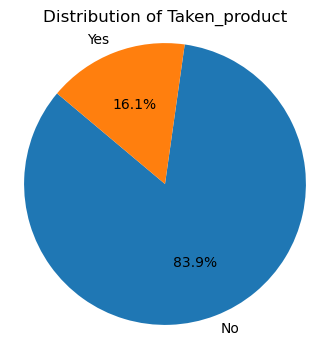

In [15]:

Taken_product_counts = df['Taken_product'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(4, 4))
plt.pie(Taken_product_counts, labels=Taken_product_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Taken_product')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### Distribution of the Numerical variable

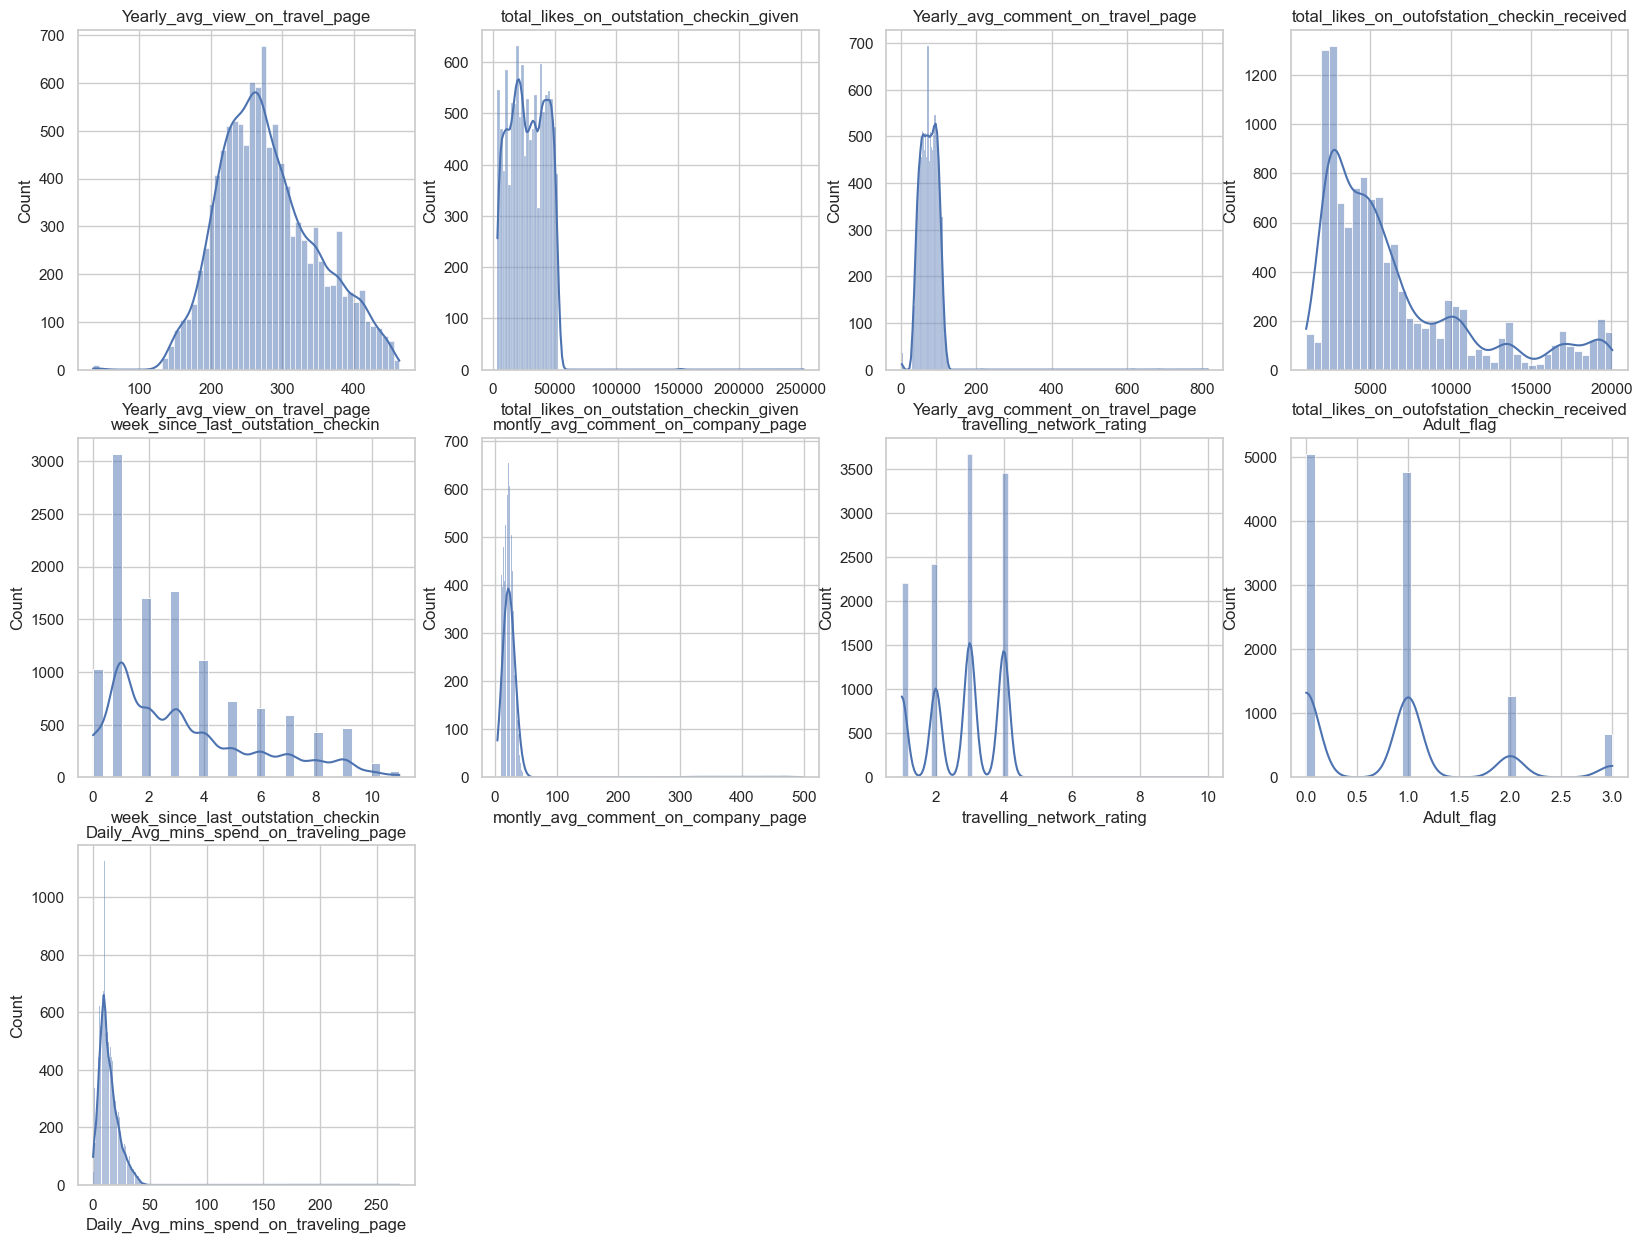

In [16]:
# Distribution plot for each numerical feature
num_columns= df.select_dtypes(exclude=['object'])
sns.set(style="whitegrid")
#num_cols = imputed_df.select_dtypes(include=['int64', 'float64']).columns
num_columns_count = len(num_columns)
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_columns):
    plt.subplot(3, 4, i % 12 + 1)
    sns.histplot(num_columns[column], kde=True)
    plt.title(column)
    if (i + 1) % 12 == 0 or i == num_columns_count - 1:
        plt.tight_layout()
        plt.show()
        if i != num_columns_count - 1:
            plt.figure(figsize=(20, 15))

#### Distribution of the Categorical variable

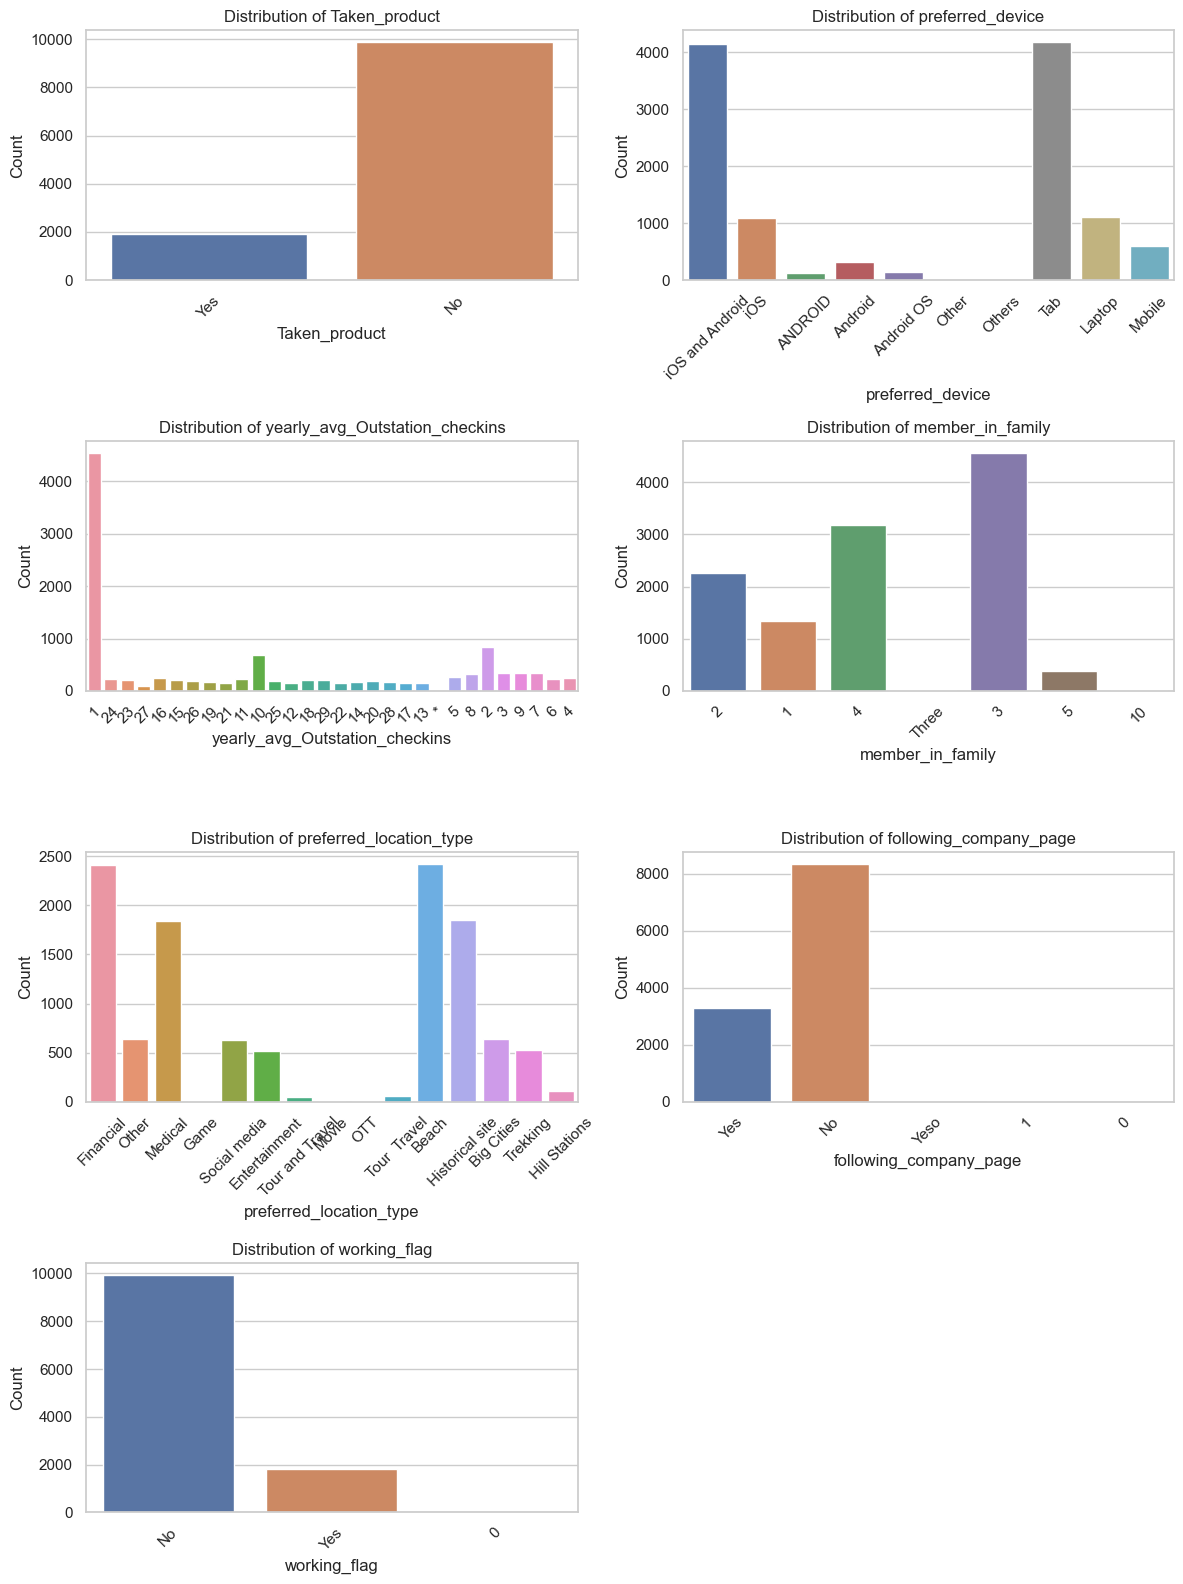

In [17]:


# Assuming cat_columns contains the selected categorical columns
cat_columns = df.select_dtypes(include=['object'])

# Calculating the number of rows and columns needed for the grid
num_rows = len(cat_columns.columns) // 2
if len(cat_columns.columns) % 2 != 0:
    num_rows += 1

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

for i, column in enumerate(cat_columns.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability if needed

# If there are any remaining empty subplots, remove them
for i in range(len(cat_columns.columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()



#### Box plot of the numerical variable

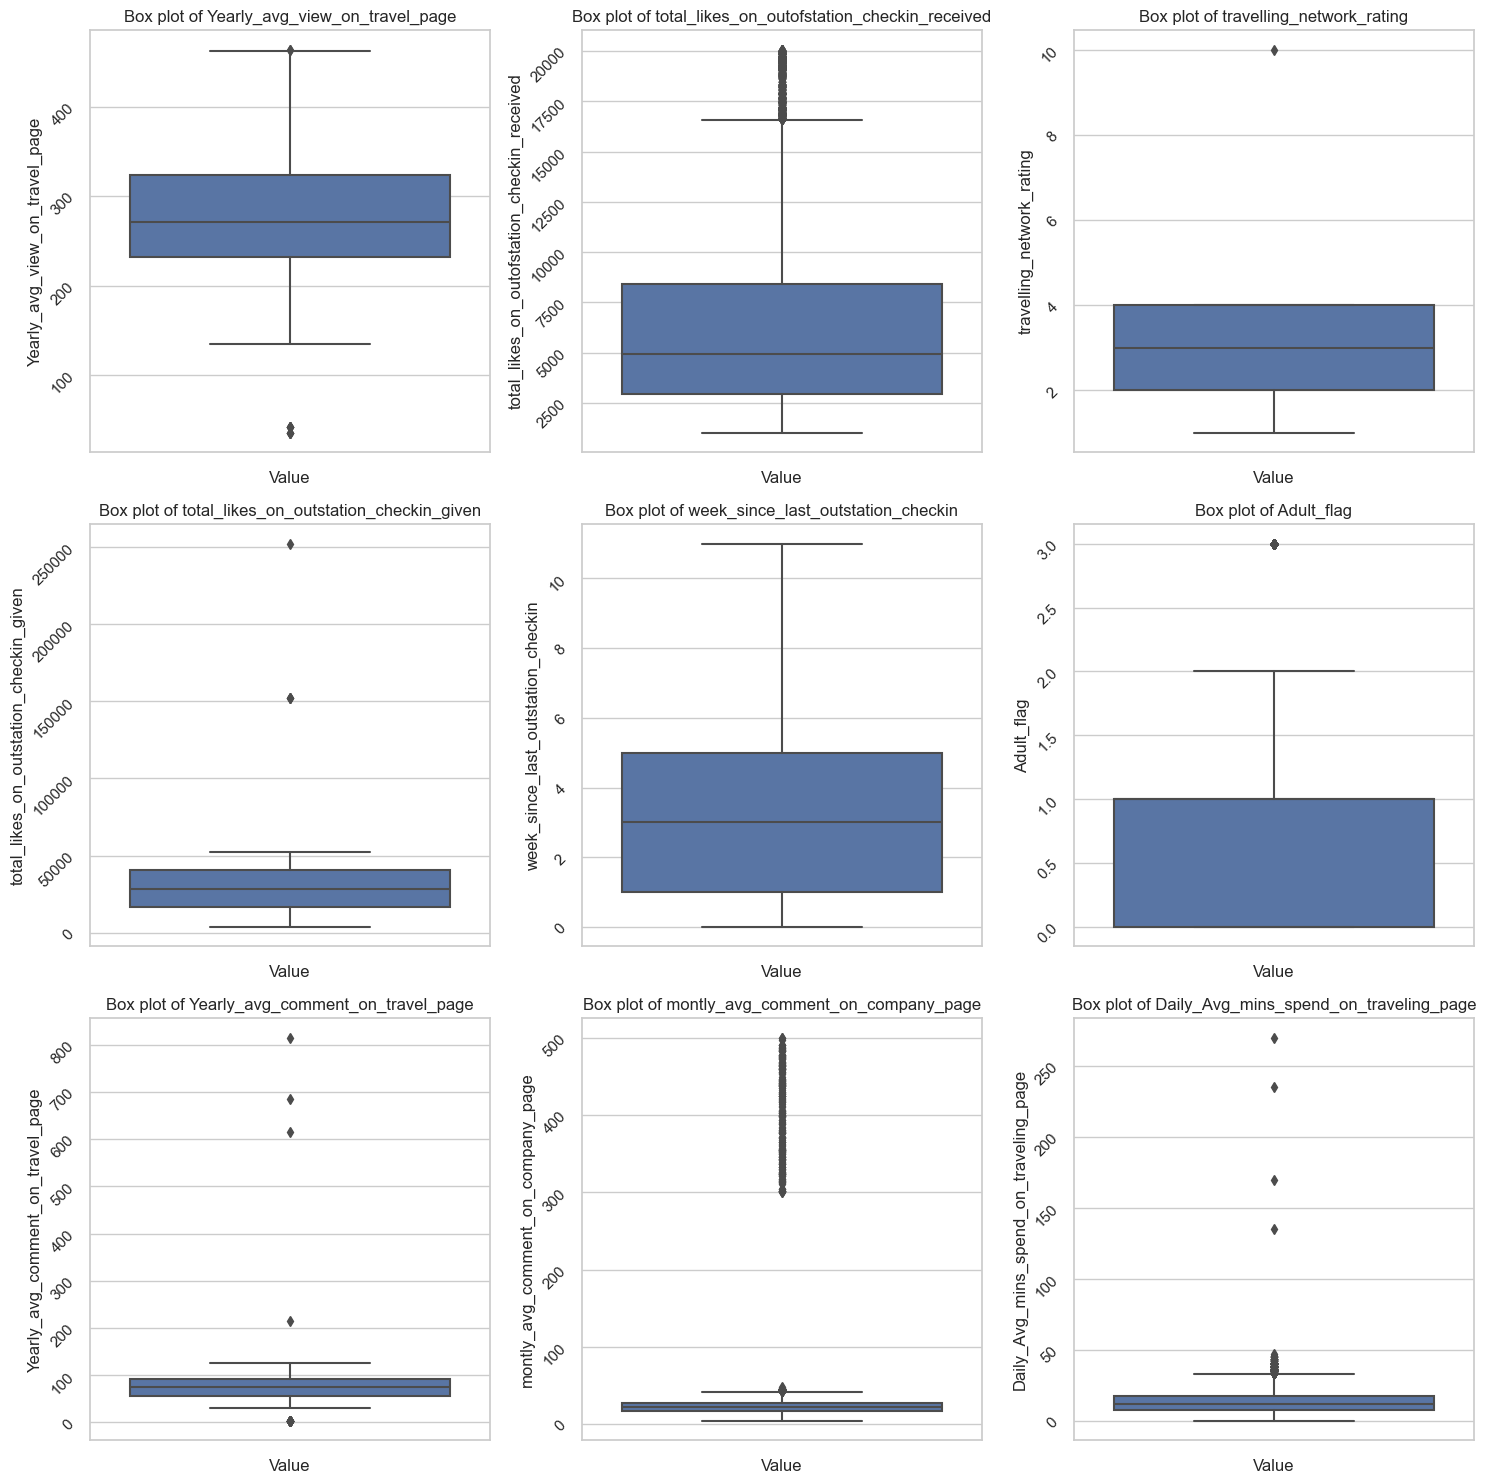

In [18]:


# Assign 'num_columns' as the numerical columns
num_columns = df.select_dtypes(exclude=['object'])

# Calculating the number of rows and columns needed for the grid
num_plots = len(num_columns.columns)
num_cols = num_plots // 3
if num_plots % 3 != 0:
    num_cols += 1

# Plotting box plots for each numeric variable
fig, axes = plt.subplots(3, num_cols, figsize=(num_cols * 5, 15))

for i, column in enumerate(num_columns.columns):
    col = i // 3
    row = i % 3
    ax = axes[row, col]
    sns.boxplot(data=df, y=column, ax=ax)
    ax.set_title(f"Box plot of {column}")
    ax.set_ylabel(column)
    ax.set_xlabel("Value")
    ax.tick_params(axis='y', rotation=45)  # Rotate y-labels for better readability if needed

# If there are any remaining empty subplots, remove them
for i in range(num_plots, num_cols * 3):
    fig.delaxes(axes[i // num_cols, i % num_cols])

plt.tight_layout()
plt.show()


### Data Cleaning

In [19]:
#Negative values : The dataset features can not have negative values, hence let's check for any negative values

negative_values = (num_columns < 0).any()
print("Columns with negative values:")
print(negative_values[negative_values].index)

Columns with negative values:
Index([], dtype='object')


In [20]:
#check for duplicates

df.duplicated().sum()

995

In [21]:
# Remove the duplicates
df.drop_duplicates(inplace=True)

In [22]:
#confirm if all duplicates have been removed
df.duplicated().sum()

0

### ### We have unexpected values present in different columns, apart from Null

 * preferred_device include different values for same e.g. ANDROID' 'Android
- "*" present in yearly_avg_Outstation_checkins
  "Three" present in member_in_family instead of numeric 3
* "Yeso" instead of Yes in following_company_page along with 1 & 0 & Yes & No
* Working flag includes 0 along with No

In [23]:
#Select the Categorical columns, and print out the unique values in each column

cat_columns= df.select_dtypes(include=['object'])
for col in cat_columns:
    print(f"Value counts for column '{col}':")
    print(df[col].unique())
    print()

Value counts for column 'Taken_product':
['Yes' 'No']

Value counts for column 'preferred_device':
['iOS and Android' 'iOS' 'ANDROID' nan 'Android' 'Android OS' 'Other'
 'Others' 'Tab' 'Laptop' 'Mobile']

Value counts for column 'yearly_avg_Outstation_checkins':
['1' '24' '23' '27' '16' '15' '26' '19' '21' '11' '10' '25' '12' '18' '29'
 nan '22' '14' '20' '28' '17' '13' '*' '5' '8' '2' '3' '9' '7' '6' '4']

Value counts for column 'member_in_family':
['2' '1' '4' 'Three' '3' '5' '10']

Value counts for column 'preferred_location_type':
['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']

Value counts for column 'following_company_page':
['Yes' 'No' 'Yeso' nan '1' '0']

Value counts for column 'working_flag':
['No' 'Yes' '0']



### Fixing the multiple values in the variables


Ticket purchases were conducted across a range of login devices. To enhance clarity, we classified them as either 'mobile' or 'laptop', with any device other than a laptop considered as part of the mobile category. This differentiation is crucial due to the observed inconsistency in identifying the purchasing device

In [24]:
# Define a mapping for replacement of the multiple values in 'preferred device'. Anything other than a laptop is considered as 'Mobile'

device_mapping= {'iOS and Android': 'Mobile',
          'iOS' : 'Mobile',
          'ANDROID' : 'Mobile',
          'Android': 'Mobile',
          'Android OS' : 'Mobile',
          'Other': 'Mobile',
          'Others' : 'Mobile',
          'Tab' : 'Mobile'}
df['preferred_device'] = df['preferred_device'].replace(device_mapping)
df['preferred_device'].unique()

array(['Mobile', nan, 'Laptop'], dtype=object)

In [25]:
#  Replacing the '*' in "yearly_avg_Outstation_checkins" with NAN

df['yearly_avg_Outstation_checkins']= df['yearly_avg_Outstation_checkins'].replace('*',np.nan)
df['yearly_avg_Outstation_checkins'] = pd.to_numeric(df['yearly_avg_Outstation_checkins'], errors='coerce', downcast='integer')

df['yearly_avg_Outstation_checkins'].unique()

array([ 1., 24., 23., 27., 16., 15., 26., 19., 21., 11., 10., 25., 12.,
       18., 29., nan, 22., 14., 20., 28., 17., 13.,  5.,  8.,  2.,  3.,
        9.,  7.,  6.,  4.])

In [26]:
# Mapping the values in the "following_company_page" column which has "['Yes' 'No' 'Yeso' nan '1' '0']", 
page_mapping= {'Yeso' : 'Yes'}
df['following_company_page'] = df['following_company_page'].replace(page_mapping)
df['following_company_page'].unique()

array(['Yes', 'No', nan, '1', '0'], dtype=object)

In [27]:
df['following_company_page']= df['following_company_page'].replace({'0':'No','1':'Yes'})


In [28]:
# Replace the '0' in "working_flag" column to'No' 
df['working_flag']= df['working_flag'].replace('0','No')
df['working_flag'].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
# "member_in_family" column has "Three", let's change it to 3
df['member_in_family']= df['member_in_family'].replace('Three',3)

In [30]:
# change the variable type in 'member_in_family' to numeric and print out the unique numbers
df['member_in_family'] = pd.to_numeric(df['member_in_family'], errors='coerce', downcast='integer')
df['member_in_family'].unique()

array([ 2,  1,  4,  3,  5, 10], dtype=int8)

In [31]:
# Check for mixed types in each column
mixed_types = df.applymap(type).nunique()
print(mixed_types)

Taken_product                                   1
Yearly_avg_view_on_travel_page                  1
preferred_device                                2
total_likes_on_outstation_checkin_given         1
yearly_avg_Outstation_checkins                  1
member_in_family                                1
preferred_location_type                         2
Yearly_avg_comment_on_travel_page               1
total_likes_on_outofstation_checkin_received    1
week_since_last_outstation_checkin              1
following_company_page                          2
montly_avg_comment_on_company_page              1
working_flag                                    1
travelling_network_rating                       1
Adult_flag                                      1
Daily_Avg_mins_spend_on_traveling_page          1
dtype: int64


#### 'preferred_device', 'preferred_location_type' and 'following_company_page'  variables have element with 'nan' which is inconsistent with the data type. They will be handled as missing values and treated later in the data preprocessing step

In [32]:
print(f"The unique elements in 'preferred_device' is {df['preferred_device'].unique()}") 
print(f"The unique elements in 'preferred_location_type' is {df['preferred_location_type'].unique()}") 
print(f"The unique elements in 'following_company_page' is {df['following_company_page'].unique()}") 

The unique elements in 'preferred_device' is ['Mobile' nan 'Laptop']
The unique elements in 'preferred_location_type' is ['Financial' 'Other' 'Medical' nan 'Game' 'Social media' 'Entertainment'
 'Tour and Travel' 'Movie' 'OTT' 'Tour  Travel' 'Beach' 'Historical site'
 'Big Cities' 'Trekking' 'Hill Stations']
The unique elements in 'following_company_page' is ['Yes' 'No' nan]


### Replacing Missing Values

In [33]:
# Checking for missing values in the dataframe
df = df.applymap(lambda x: np.nan if x == 'nan' else x) #Replacing all string NaN values to Np.nan, in case any

In [34]:
#Let's see how much are the missing values from the datset
RED, BOLD, RESET = '\033[91m', '\033[1m','\033[0m'
total_missing = df.isnull().sum().sum()
total_cells = df.size
missing_percentage = (total_missing / total_cells) * 100
print(f"The total number of missing values are {BOLD}{RED}{total_missing}{RESET}, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of total data.")

The total number of missing values are 1272, which is 0.74% of total data.


In [35]:
# Lets check count the % of missing values for each variable in the dataset
missing = df.columns[df.isna().any()].tolist()
total_rows = len(df)
for column in missing:
    missing_count = df[column].isna().sum()
    missing_percentage = (missing_count / total_rows) * 100
    print(f"{BOLD}{column}{RESET} has {BOLD}{RED}{missing_count}{RESET} missing values, which is {BOLD}{RED}{missing_percentage:.2f}%{RESET} of the column.")

Yearly_avg_view_on_travel_page has 481 missing values, which is 4.47% of the column.
preferred_device has 53 missing values, which is 0.49% of the column.
total_likes_on_outstation_checkin_given has 320 missing values, which is 2.97% of the column.
yearly_avg_Outstation_checkins has 76 missing values, which is 0.71% of the column.
preferred_location_type has 31 missing values, which is 0.29% of the column.
Yearly_avg_comment_on_travel_page has 206 missing values, which is 1.91% of the column.
following_company_page has 103 missing values, which is 0.96% of the column.
Adult_flag has 1 missing values, which is 0.01% of the column.
Daily_Avg_mins_spend_on_traveling_page has 1 missing values, which is 0.01% of the column.


In [36]:
#Let's check missing values post treatment
print('Missing Values in the dataset after treatment :', df.isnull().sum().sum())

Missing Values in the dataset after treatment : 1272


In [37]:
#Replace the missing values in the categorical colunmns with the mode

cat_columns = df.select_dtypes(include=['object'])
#cat_columns = ['preferred_device', 'preferred_location_type', 'following_company_page', 'working_flag', 'Adult_flag']
for i in cat_columns:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [38]:


#Replace the missing values in the numerical olunmns with the median

num_columns = df.select_dtypes(exclude=['object'])
for column in num_columns:
    median_value = df[column].median()
    df[column].fillna(median_value, inplace=True)
    
 

In [39]:
#Let's check missing values post treatment
print('Missing Values in the dataset after treatment :', df.isnull().sum().sum())

Missing Values in the dataset after treatment : 0


### Handling Outliers in the dataset using the IQR method

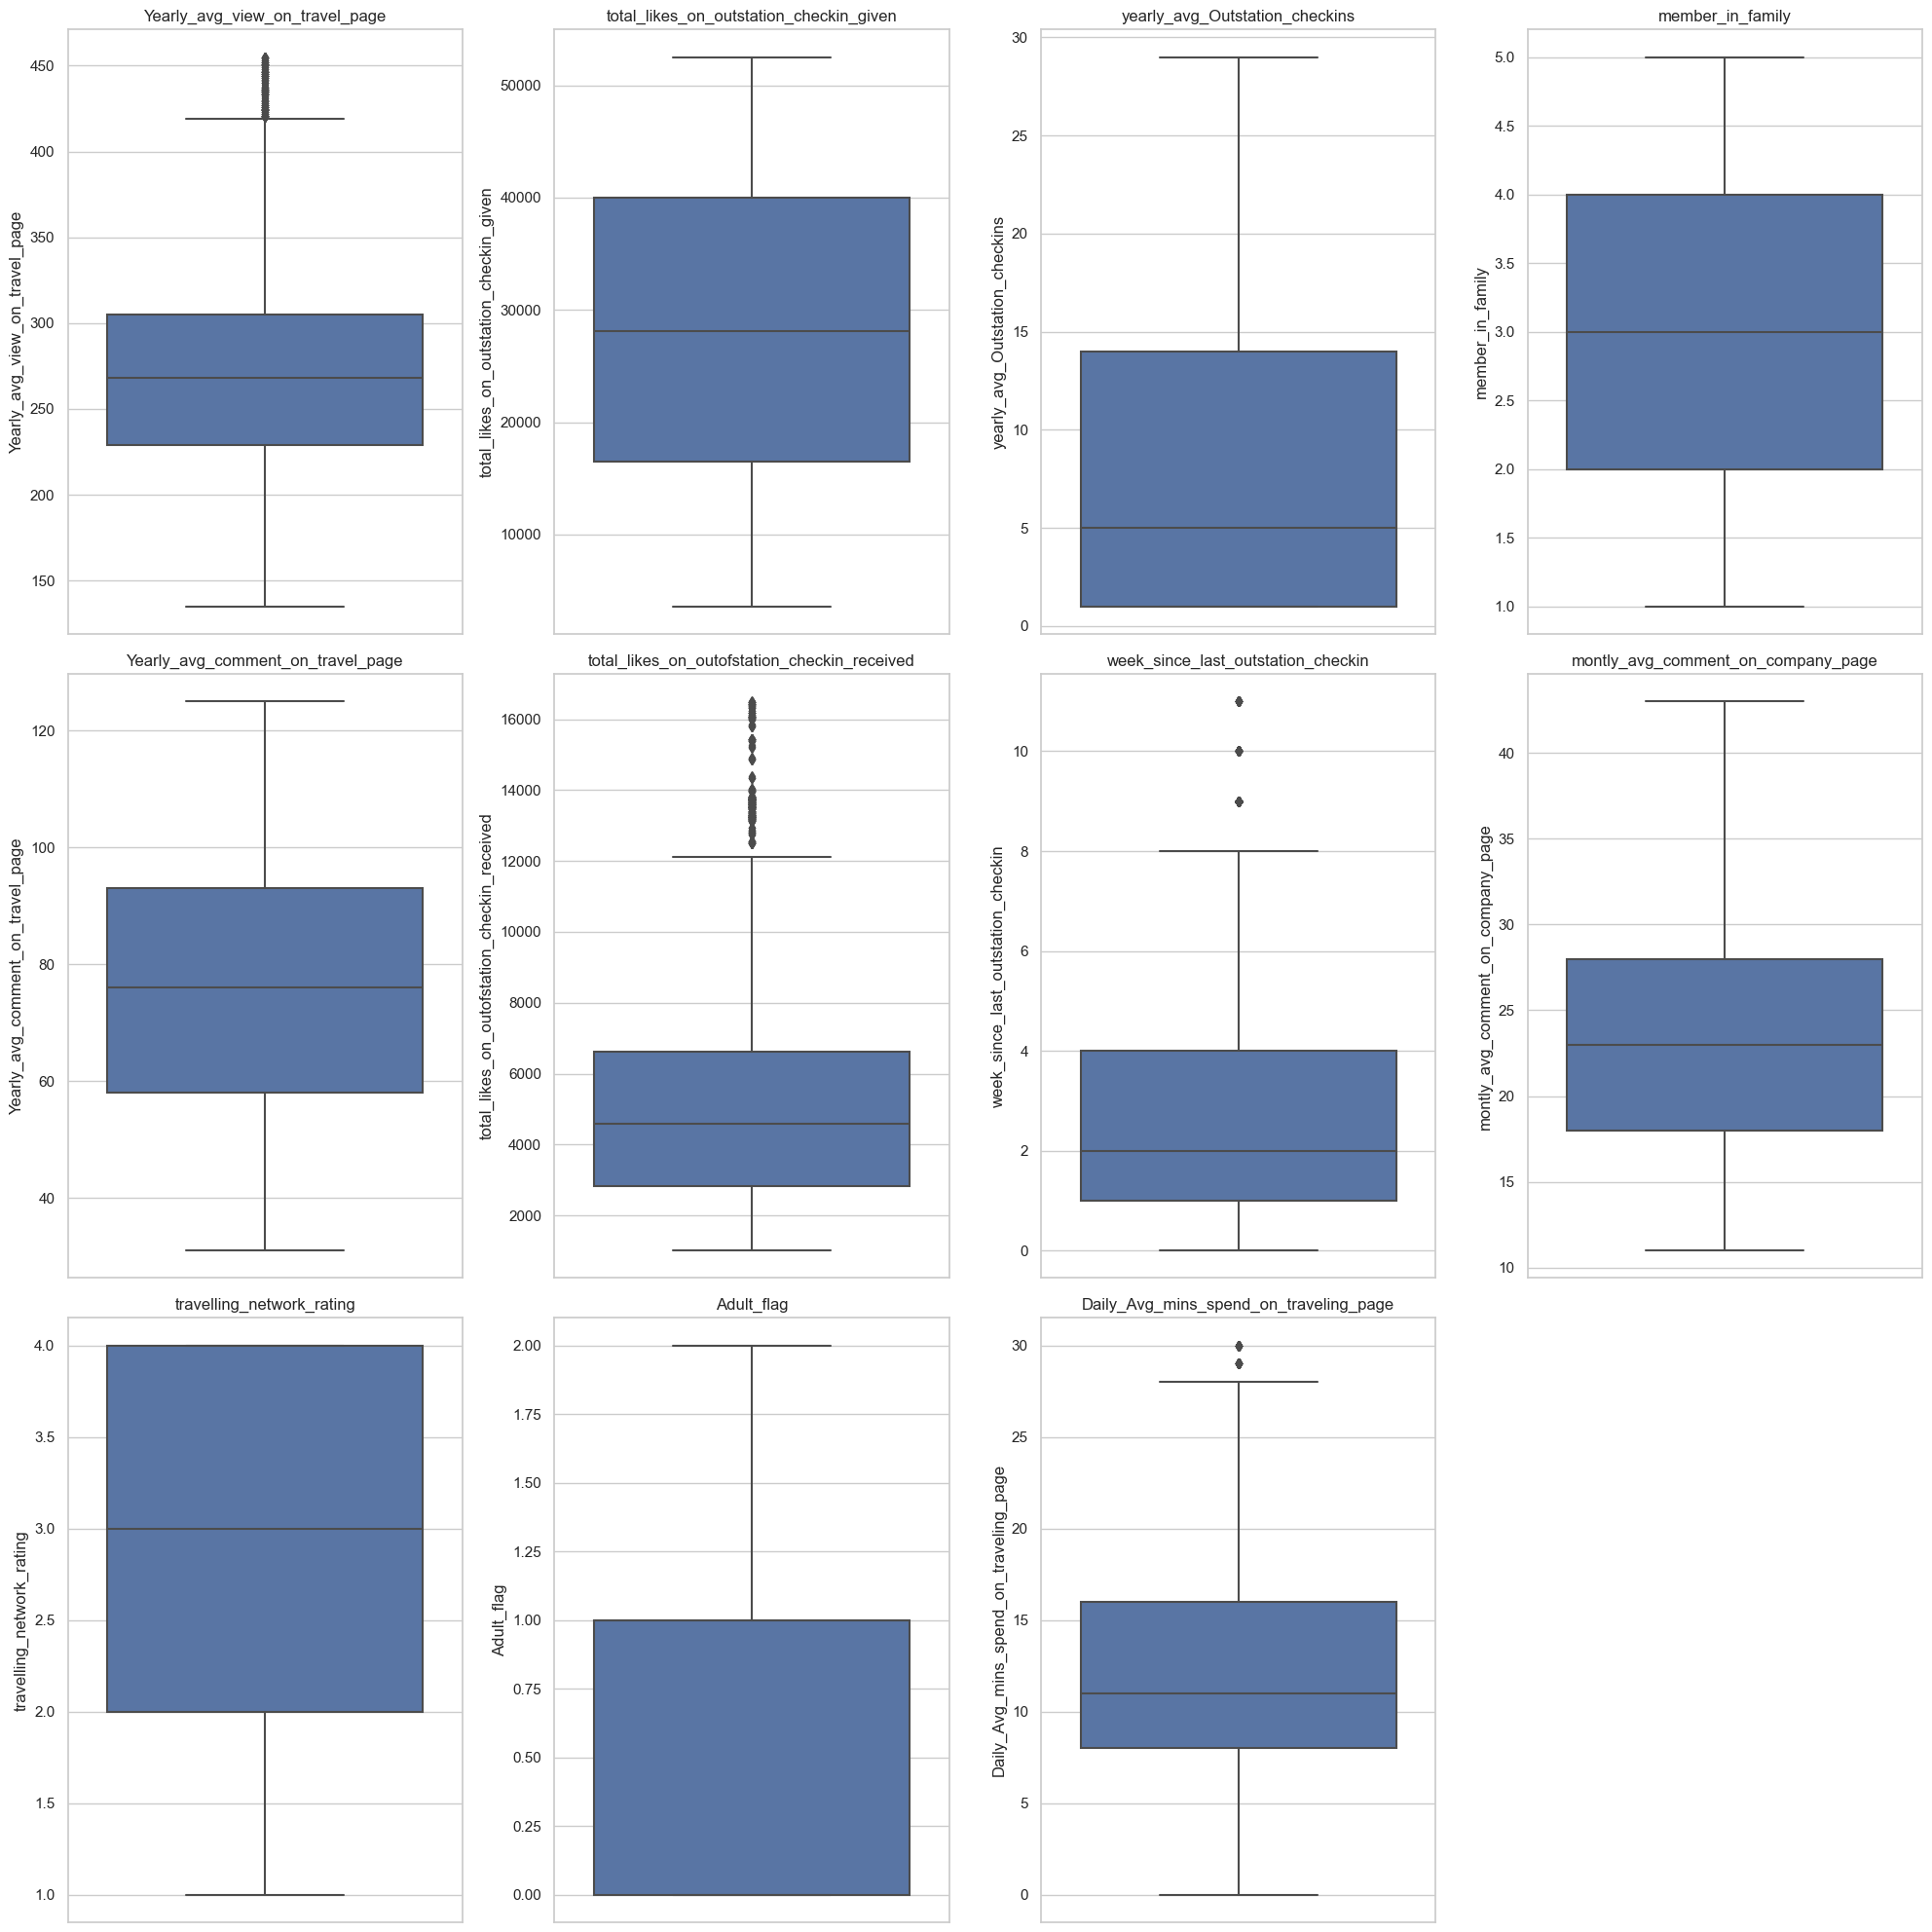

In [40]:


# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered


# Create a new DataFrame to store the filtered data without outliers
df_no_outliers = df.copy()

# Iterate over each numerical column in the DataFrame and remove outliers
for column in df.select_dtypes(include='number'):
    df_no_outliers = remove_outliers_iqr(df_no_outliers, column)

# Box plot for each numerical feature
plt.figure(figsize=(20,20))
num_columns = df_no_outliers.select_dtypes(include='number').columns
num_cols_count = len(num_columns)
for i, column in enumerate(num_columns):
    plt.subplot(3, 4, i % 12 + 1)
    sns.boxplot(y=df_no_outliers[column])
    plt.title(column)
    if (i + 1) % 12 == 0 or i == num_cols_count - 1:
        plt.tight_layout()
        plt.show()
        if i != num_cols_count - 1:
            plt.figure(figsize=(15, 10))
            



## Data Visualization after Cleaning

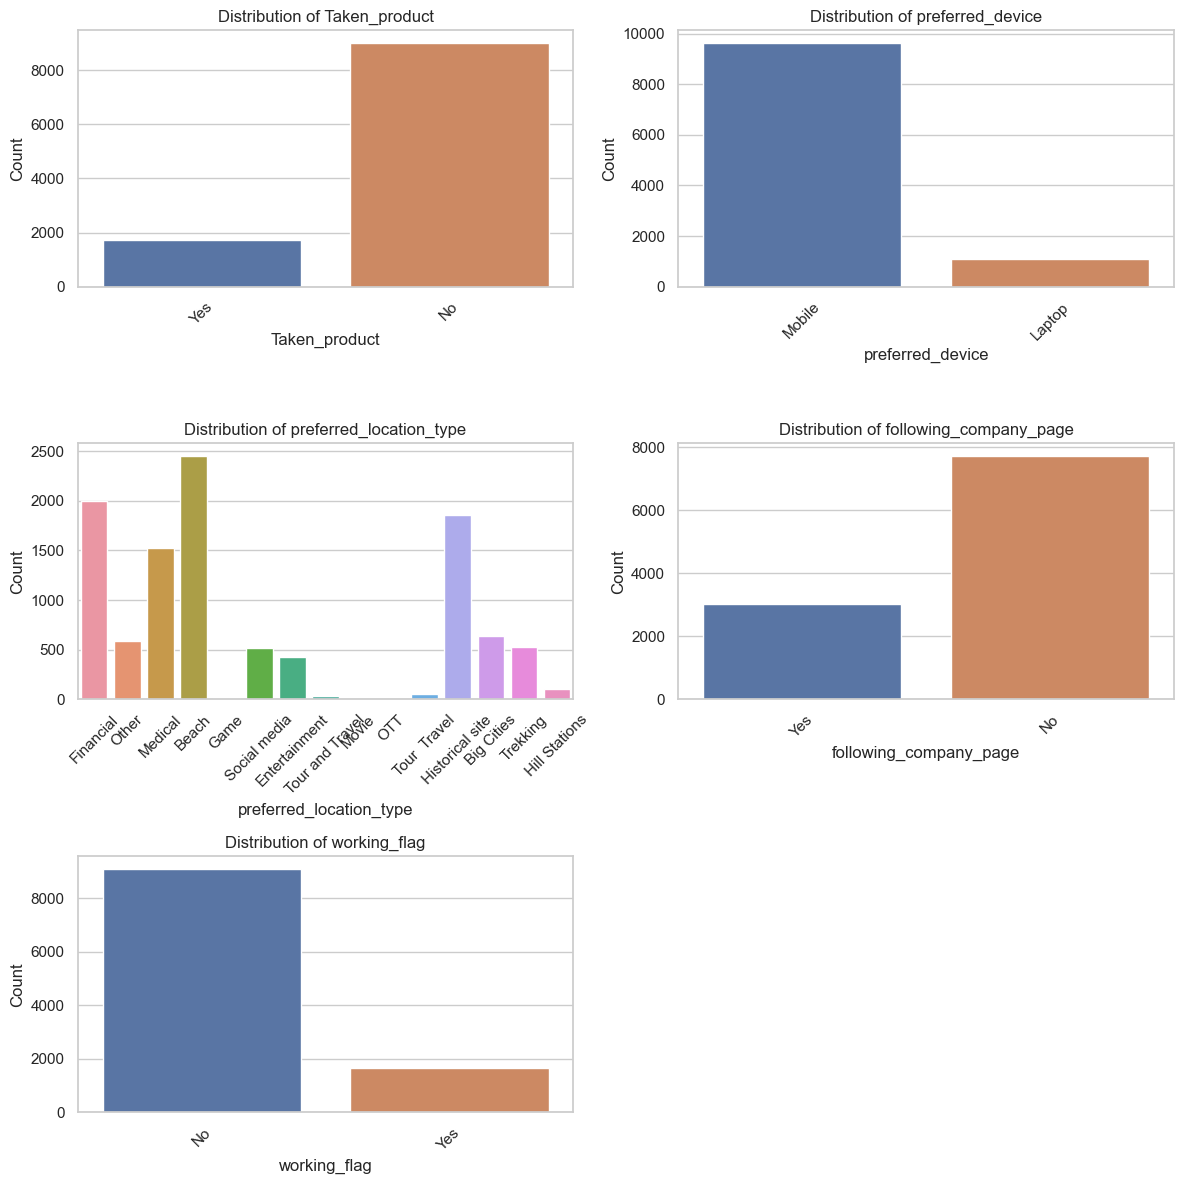

In [41]:


# Assuming cat_columns contains the selected categorical columns
cat_columns = df.select_dtypes(include=['object'])

# Calculating the number of rows and columns needed for the grid
num_rows = len(cat_columns.columns) // 2
if len(cat_columns.columns) % 2 != 0:
    num_rows += 1

# Plotting the distribution of each categorical variable
fig, axes = plt.subplots(num_rows, 2, figsize=(12, num_rows * 4))

for i, column in enumerate(cat_columns.columns):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f"Distribution of {column}")
    ax.set_xlabel(column)
    ax.set_ylabel("Count")
    ax.tick_params(axis='x', rotation=45)  # Rotate x-labels for better readability if needed

# If there are any remaining empty subplots, remove them
for i in range(len(cat_columns.columns), num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


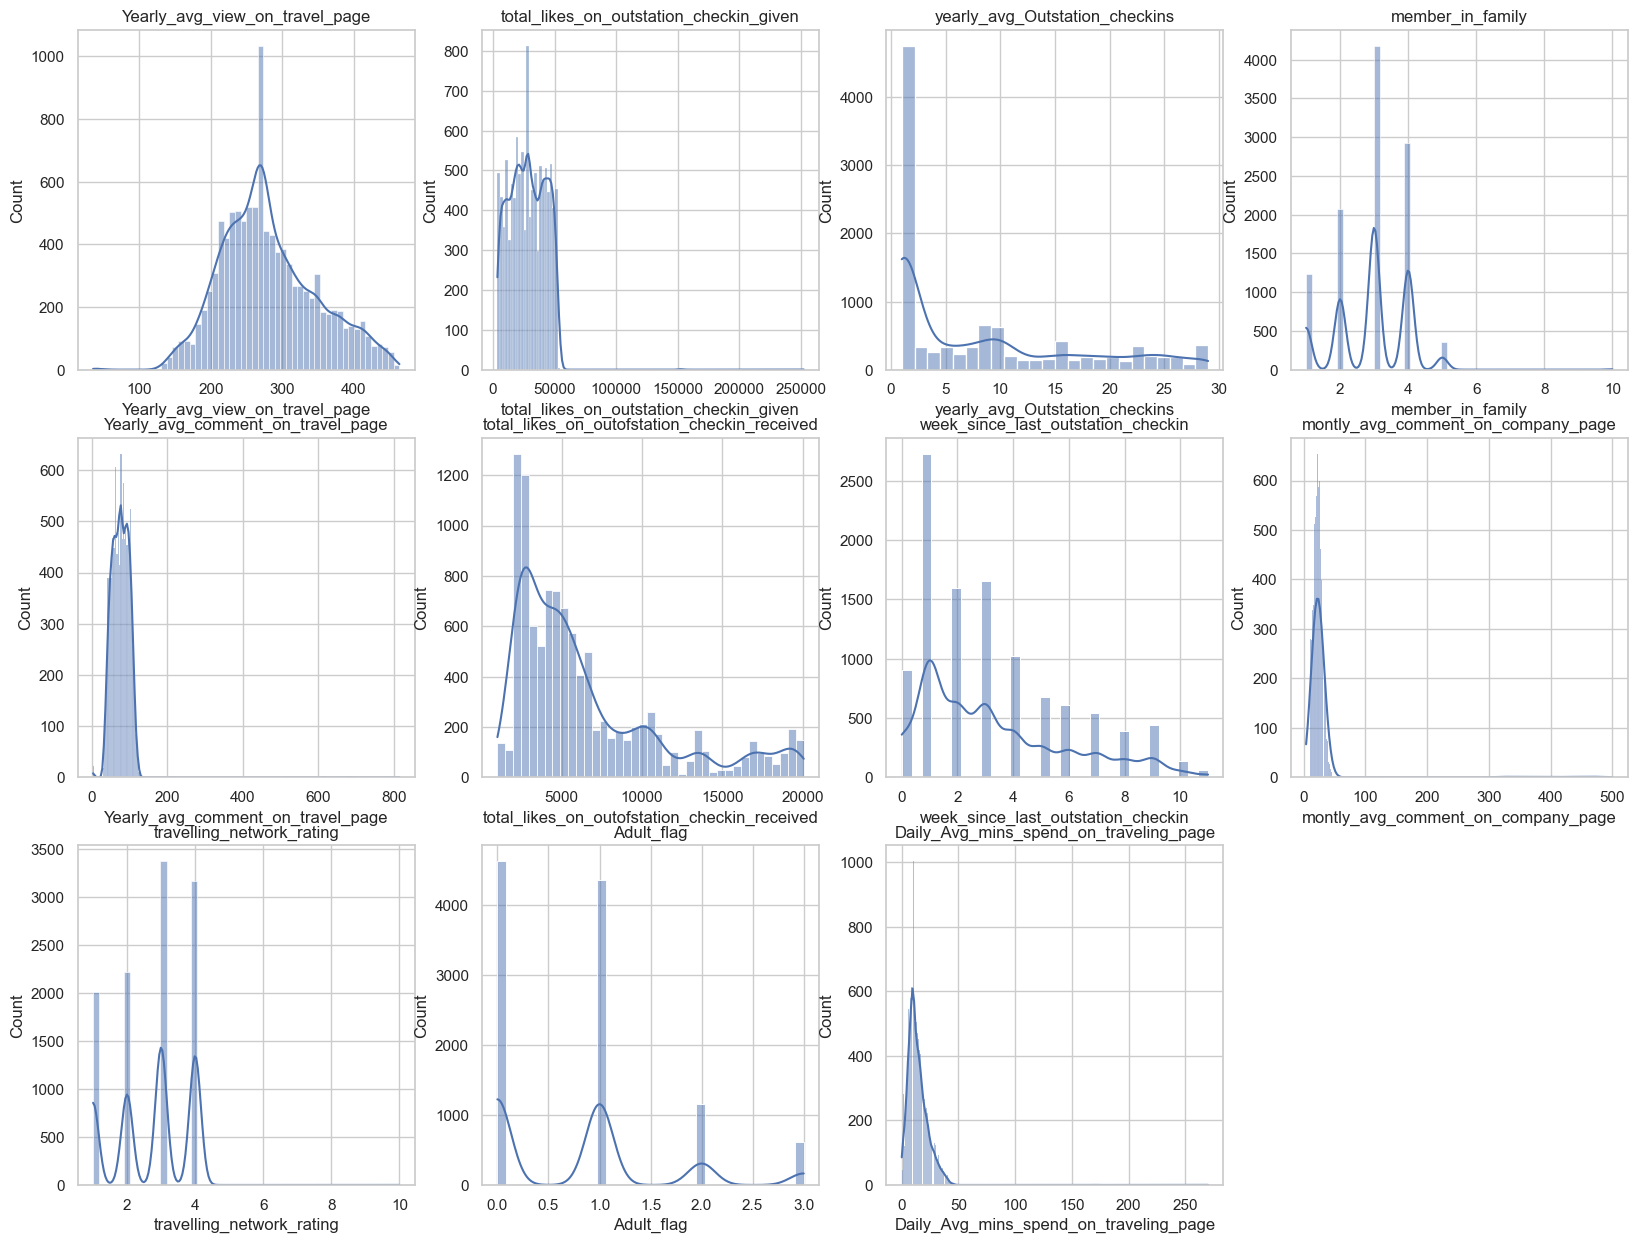

In [42]:
# Distribution plot for each numerical feature
num_columns= df.select_dtypes(exclude=['object'])
sns.set(style="whitegrid")
#num_cols = imputed_df.select_dtypes(include=['int64', 'float64']).columns
num_columns_count = len(num_columns)
plt.figure(figsize=(20, 15))
for i, column in enumerate(num_columns):
    plt.subplot(3, 4, i % 12 + 1)
    sns.histplot(num_columns[column], kde=True)
    plt.title(column)
    if (i + 1) % 12 == 0 or i == num_columns_count - 1:
        plt.tight_layout()
        plt.show()
        if i != num_columns_count - 1:
            plt.figure(figsize=(20, 15))

### Correlation Heatmap

In [43]:


# Encode the Categorical variable 

le = preprocessing.LabelEncoder()
categorical = df.select_dtypes(include = object).columns
for cat_colmn in categorical:
    df[cat_colmn] = le.fit_transform(df[cat_colmn])

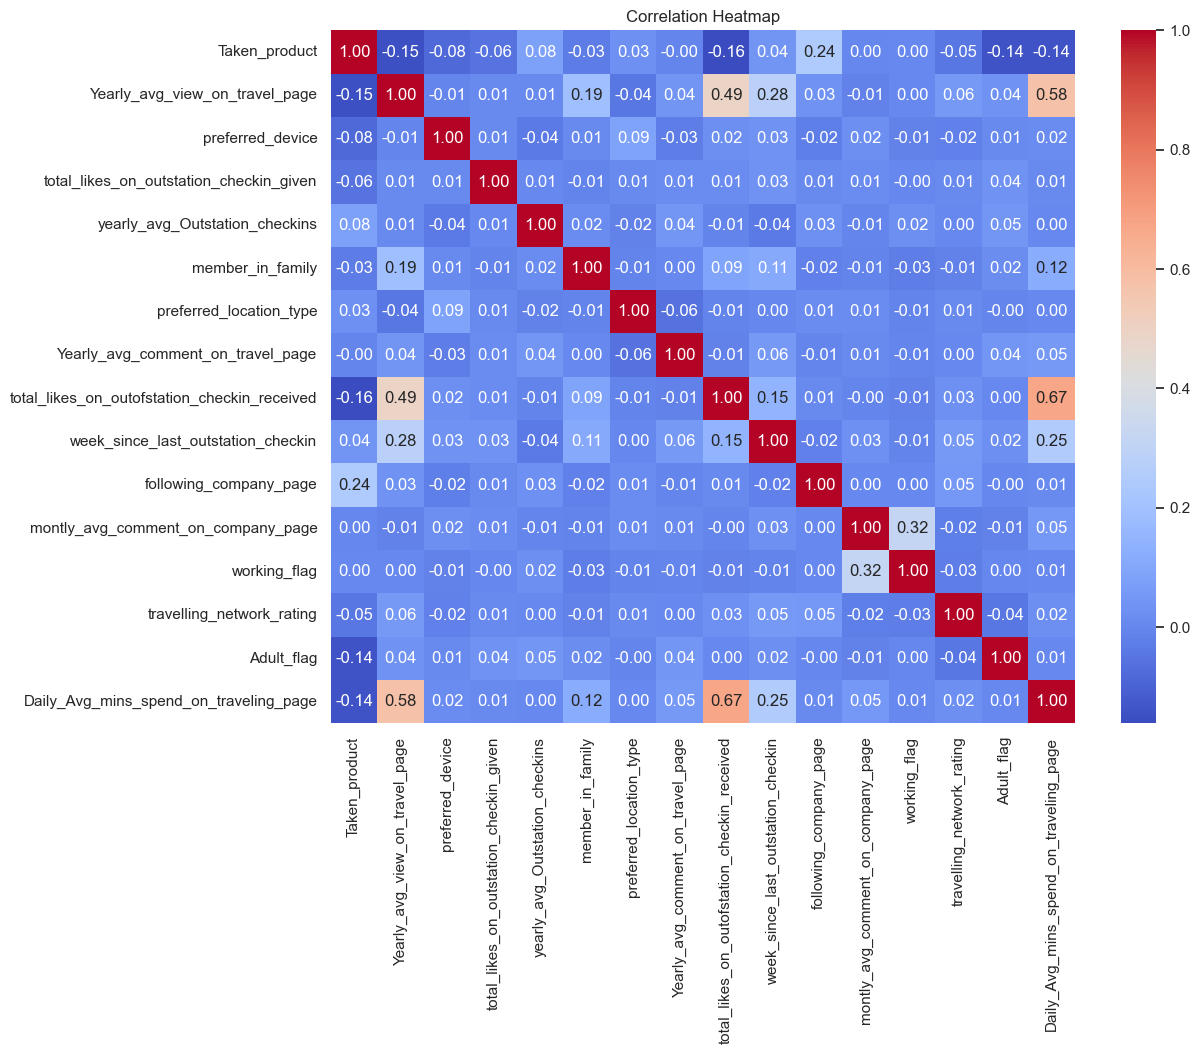

In [44]:

corr = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Data Preprocessing

### Encode the categorical variables using a norminal encoder

In [45]:
#Assign the categorical variable to be encoded

cat_columns= df[['preferred_device','yearly_avg_Outstation_checkins','member_in_family','preferred_location_type','following_company_page','working_flag']]

The categorical variables were encoded using the One-hot-encoder. Unlike the Ordinal encoder and Label encoder which show ranking and suitable where there are hierarchies in the unique element of the variable . The One-hot-encoder is suitable for nominal relationships. We used the One-hot encoding to prevent the model from assuming a false hierarchical relationship between the element of the variable and thereby introduce bias

In [46]:
# # Perform one-hot encoding
encoded_cat_columns = pd.get_dummies(cat_columns, drop_first=True)

# Concatenate the original DataFrame with the encoded categorical columns
df_encoded = pd.concat([df.drop(columns=cat_columns.columns), encoded_cat_columns], axis=1)


In [47]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10765 entries, 1000001 to 1011760
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Taken_product                                 10765 non-null  int32  
 1   Yearly_avg_view_on_travel_page                10765 non-null  float64
 2   total_likes_on_outstation_checkin_given       10765 non-null  float64
 3   Yearly_avg_comment_on_travel_page             10765 non-null  float64
 4   total_likes_on_outofstation_checkin_received  10765 non-null  int64  
 5   week_since_last_outstation_checkin            10765 non-null  int64  
 6   montly_avg_comment_on_company_page            10765 non-null  int64  
 7   travelling_network_rating                     10765 non-null  int64  
 8   Adult_flag                                    10765 non-null  float64
 9   Daily_Avg_mins_spend_on_traveling_page        10765 n

### Plot the distribution of the Target variable to show the imbalance

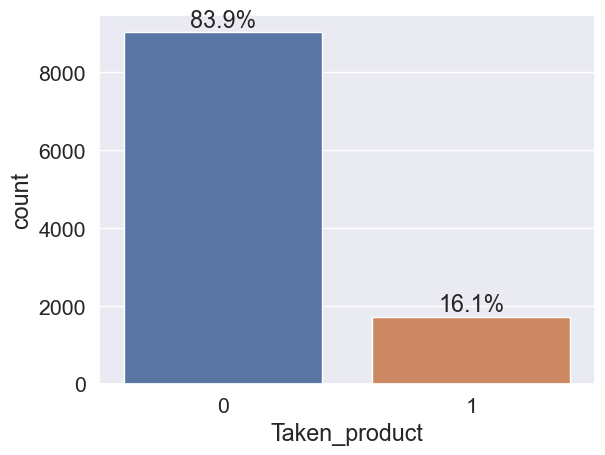

In [48]:
# Set the font scale for better readability
sns.set(font_scale=1.4)

# Create the countplot
ax = sns.countplot(x='Taken_product', data=df)

# Calculate and display percentages on the countplot
total = len(df['Taken_product'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

# Show the plot
plt.show()

### Treat the imbalance in the target variable by using the SMOTE oversampling technique

The distribution of the target variable was heavily biased. It was at a proportion of 83.9% to 16.1% in favour of the ‘No’. To address this imbalance, we up sampled the minority class using SMOTE. This technique generates synthetic data points by interpolating between existing minority class samples to effectively balance the class distribution. 
This approach ensured that the model was trained on a dataset that better represents the underlying distribution reducing the risk of over-fitting and minimizing the potential introduction of noise and bias

In [49]:


# Assign data to X and y 
X = df_encoded.drop('Taken_product', axis=1)  # Features
y = df_encoded['Taken_product']  # Target variable

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to upsample the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the upsampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

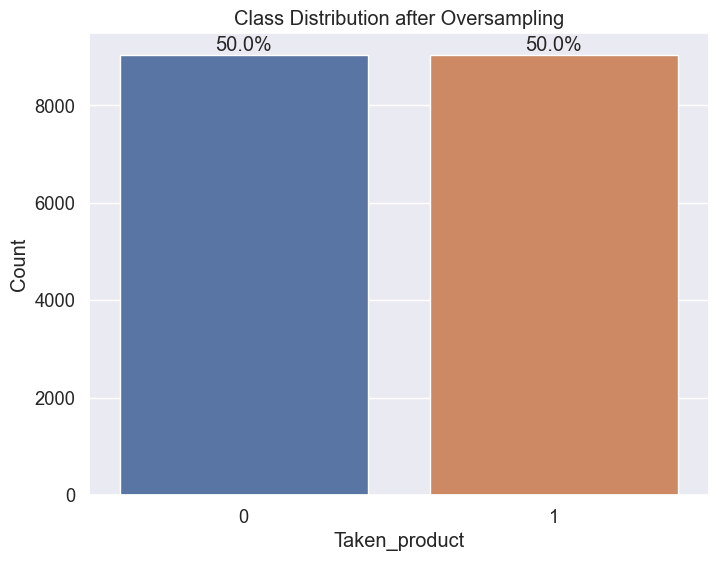

In [50]:



# Set the font scale for better visualization
sns.set(font_scale=1.2)

# Plotting the distribution of classes after oversampling
plt.figure(figsize=(8, 6))
ax = sns.countplot(x=y_resampled)
plt.title('Class Distribution after Oversampling')
plt.xlabel('Taken_product')
plt.ylabel('Count')

# Calculate and display percentages on the countplot
total_resampled = len(y_resampled)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_resampled)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()


### Feature Scaling

We used the standard Scaler to transform the values of numerical features and the encoded categorical features to a specific range. The purpose of the scaling was to ensure that all features have similar ranges of values, which can be crucial for the machine learning algorithms because they are sensitive to the scale of features. Scaling helps to normalize the data distribution and prevent features with larger magnitudes from dominating those with smaller magnitudes during model training. We applied the Standard scaler to transform the features of a dataset to have a mean of 0 and a standard deviation of 1. This maintains the shape of the original distribution.

In [51]:


# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data using the fitted scaler
X_test_scaled = scaler.transform(X_test)

## The Machine Learning Models

### Logistic Regression

In [52]:


# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train_scaled, y_train)

predictions = logreg.predict(X_test_scaled)

# Compute the accuracy of the testing predictions
accuracy = accuracy_score(y_test, predictions)

# Use the trained model to make predictions on the training data
train_predictions = logreg.predict(X_train_scaled)

# Compute the accuracy of the training predictions
train_accuracy = accuracy_score(y_train, train_predictions)

#Test the model for over-fitting
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", accuracy)

Training Accuracy: 0.717954042081949
Test Accuracy: 0.714562569213732


The accuracies of the Traiining and Testing sets are very close in value, This implies that the model is not overfitting

In [53]:
from sklearn.metrics import confusion_matrix, classification_report

cm_log = confusion_matrix(y_test, predictions)
print(cm_log)

[[1308  534]
 [ 497 1273]]


In [54]:
#Classification Report

from sklearn.metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1842
           1       0.70      0.72      0.71      1770

    accuracy                           0.71      3612
   macro avg       0.71      0.71      0.71      3612
weighted avg       0.71      0.71      0.71      3612



In [55]:
# Calculate the accuracy, Precision, Recall and Specificity


In [56]:
TP_log = cm_log[1,1]
TN_log = cm_log[0,0]
FP_log = cm_log[0,1]
FN_log = cm_log[1,0]

In [57]:
calculated_accuracy = (TP_log + TN_log)/ (TP_log +TN_log + FP_log + FN_log)
calculated_precision = (TP_log)/(TP_log + FP_log)
calculated_recall = (TP_log)/(TP_log + FN_log)
calculated_specificity = (TN_log)/(TN_log + FP_log)
f1_score = 2 * (calculated_precision * calculated_recall) / (calculated_precision + calculated_recall)

In [58]:
print(f"Calculated accuracy = , {calculated_accuracy:.4f}")
print(f"Calculated precision = , {calculated_precision:.4f}")
print(f"Calculated recall = , {calculated_recall:.4f}")
print(f"Calculated f1_score = , {f1_score:.4f}")
print(f"Calculated_specificity = , {calculated_specificity:.4f}")

Calculated accuracy = , 0.7146
Calculated precision = , 0.7045
Calculated recall = , 0.7192
Calculated f1_score = , 0.7118
Calculated_specificity = , 0.7101


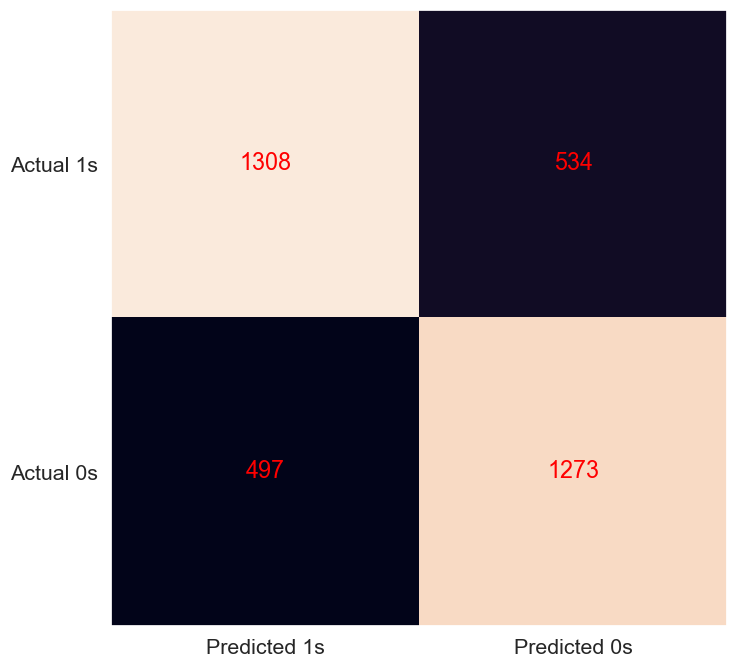

In [59]:
#Plot the confusion Matrix

sns.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_log)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 1s', 'Predicted 0s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(0,2):
    for j in range(0,2):
        ax.text(j, i, cm_log[i, j], ha='center', va='center', color='red')
plt.show() 

#### Plotting the ROC curve

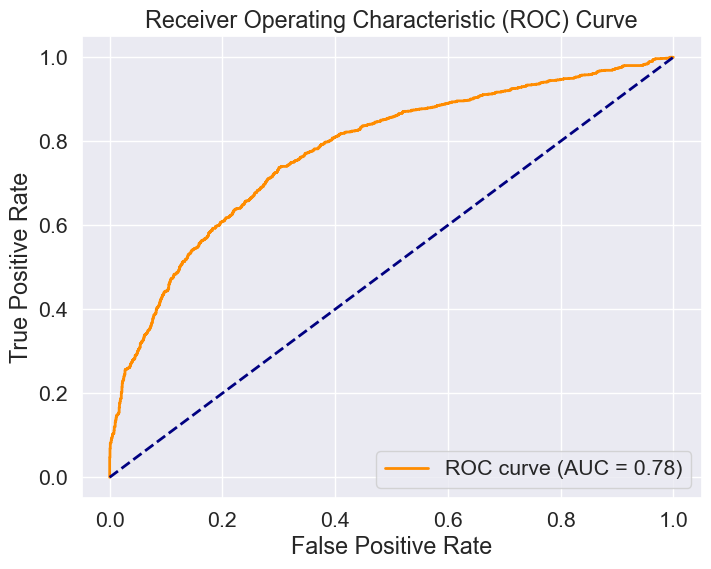

In [60]:


y_test_probs = logreg.predict_proba(X_test_scaled)[:, 1]
 
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
 
# Calculate the area under the ROC curve (AUC)
roc_auc = roc_auc_score(y_test, y_test_probs)
 
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Logistic Regression model optimization using Grid search hyper parameter tuning

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

# Define the parameter grid for grid search
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create logistic regression model
logreg = LogisticRegression()

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Predictions on the test set using the best estimator found by GridSearchCV
y_pred_grid = grid_search.best_estimator_.predict(X_test_scaled)

# Generate a classification report
report = classification_report(y_test, y_pred_grid)

# Print the classification report
print(report)

# Calculate GridSearch CV score on test set
test_score = grid_search.score(X_test_scaled, y_test)
print('GridSearch CV score on test set: {:.4f}'.format(test_score))

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_grid)

# Calculate metrics from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)

# Print out the additional metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1_score))
print("Specificity: {:.4f}".format(specificity))


Best Parameters: {'C': 1}
Best Score: 0.7176775287721833
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1842
           1       0.70      0.72      0.71      1770

    accuracy                           0.71      3612
   macro avg       0.71      0.71      0.71      3612
weighted avg       0.71      0.71      0.71      3612

GridSearch CV score on test set: 0.7146
Accuracy: 0.7146
Precision: 0.7045
Recall: 0.7192
F1-score: 0.7118
Specificity: 0.7101


###  Logistic Regression model optimization using Optuna hyperparamater tunning

In [62]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Define the objective function to optimize
def objective(trial):
    # Define hyperparameters to search
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    C = trial.suggest_loguniform('C', 0.001, 10.0)
    solver = trial.suggest_categorical('solver', ['liblinear', 'saga'])

    # Instantiate Logistic Regression model with the suggested hyperparameters
    model = LogisticRegression(penalty=penalty, C=C, solver=solver)

    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on the testing set
    y_pred_rs = model.predict(X_test_scaled)

    # Calculate accuracy
    accuracy_rs = accuracy_score(y_test, y_pred_rs)

    return accuracy_rs

# Perform hyperparameter optimization with Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best hyperparameters and the best score
print("Best hyperparameters found:", study.best_params)
print("Best accuracy score found:", study.best_value)

# Get the best parameters
best_params = study.best_params

# Train a Logistic Regression model with the best parameters
best_model = LogisticRegression(**best_params)
best_model.fit(X_train_scaled, y_train)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test_scaled)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate metrics from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2 * (precision * recall) / (precision + recall)
specificity = tn / (tn + fp)

# Print out the additional metrics
print("Accuracy: {:.4f}".format(accuracy))
print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1_score))
print("Specificity: {:.4f}".format(specificity))


[I 2024-05-08 21:54:58,867] A new study created in memory with name: no-name-2a8c7b0b-35e4-47ad-b7dd-170e35eb8089
[I 2024-05-08 21:54:58,892] Trial 0 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.708063377865797, 'solver': 'liblinear'}. Best is trial 0 with value: 0.714562569213732.
[I 2024-05-08 21:54:58,915] Trial 1 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 1.09363764687843, 'solver': 'liblinear'}. Best is trial 0 with value: 0.714562569213732.
[I 2024-05-08 21:54:58,976] Trial 2 finished with value: 0.7134551495016611 and parameters: {'penalty': 'l1', 'C': 0.050158155488251505, 'solver': 'saga'}. Best is trial 0 with value: 0.714562569213732.
[I 2024-05-08 21:54:59,030] Trial 3 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.003582656003438668, 'solver': 'saga'}. Best is trial 0 with value: 0.714562569213732.
[I 2024-05-08 21:54:59,064] Trial 4 finished with value: 0.713732004429678

[I 2024-05-08 21:55:00,439] Trial 40 finished with value: 0.7148394241417497 and parameters: {'penalty': 'l1', 'C': 2.967507552247502, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:00,468] Trial 41 finished with value: 0.7148394241417497 and parameters: {'penalty': 'l2', 'C': 0.3471776905247261, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:00,496] Trial 42 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.5996997491059883, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:00,525] Trial 43 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.05017129903356295, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:00,554] Trial 44 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.14482631544920962, 'solver': 'liblinear'}. Best i

[I 2024-05-08 21:55:01,781] Trial 80 finished with value: 0.7137320044296789 and parameters: {'penalty': 'l1', 'C': 0.47597722603312964, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:01,810] Trial 81 finished with value: 0.7148394241417497 and parameters: {'penalty': 'l2', 'C': 0.3429555171890028, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:01,841] Trial 82 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.792130675073593, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:01,871] Trial 83 finished with value: 0.7148394241417497 and parameters: {'penalty': 'l2', 'C': 0.35625877866017935, 'solver': 'liblinear'}. Best is trial 27 with value: 0.7148394241417497.
[I 2024-05-08 21:55:01,901] Trial 84 finished with value: 0.714562569213732 and parameters: {'penalty': 'l2', 'C': 0.2631232774340513, 'solver': 'liblinear'}. Best 

Best hyperparameters found: {'penalty': 'l2', 'C': 0.3984367073384319, 'solver': 'liblinear'}
Best accuracy score found: 0.7148394241417497
              precision    recall  f1-score   support

           0       0.72      0.71      0.72      1842
           1       0.70      0.72      0.71      1770

    accuracy                           0.71      3612
   macro avg       0.71      0.71      0.71      3612
weighted avg       0.72      0.71      0.71      3612

Accuracy: 0.7148
Precision: 0.7049
Recall: 0.7192
F1-score: 0.7120
Specificity: 0.7106


### Support Vector Machine

In [63]:

# instantiate classifier with default hyperparameters
svc=SVC() 
# fit classifier to training set
model_svc = svc.fit(X_train_scaled,y_train)

# Compute accuracy on the training set
y_pred_train_svc = model_svc.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_pred_train_svc)
print("Training Accuracy:", train_accuracy)


# Compute accuracy on the testing set
y_pred_test_svc = model_svc.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_pred_test_svc)
print("Testing Accuracy:", test_accuracy)



Training Accuracy: 0.918327796234773
Testing Accuracy: 0.9100221483942414


In [64]:
# Generate the Confusion matrix 

cm_svm = confusion_matrix(y_test, y_pred_test_svc)

In [65]:
TP_svm = cm_svm[1,1]
TN_svm = cm_svm[0,0]
FP_svm = cm_svm[0,1]
FN_svm = cm_svm[1,0]

In [66]:
print('Confusion matrix\n\n', cm_svm)

print('\nTrue Positives(TP) = ', cm_svm[0,0])

print('\nTrue Negatives(TN) = ', cm_svm[1,1])

print('\nFalse Positives(FP) = ', cm_svm[0,1])

print('\nFalse Negatives(FN) = ', cm_svm[1,0])

Confusion matrix

 [[1653  189]
 [ 136 1634]]

True Positives(TP) =  1653

True Negatives(TN) =  1634

False Positives(FP) =  189

False Negatives(FN) =  136


In [67]:
calculated_accuracy = (TP_svm + TN_svm)/ (TP_svm +TN_svm + FP_svm + FN_svm)
calculated_precision = (TP_svm)/(TP_svm + FP_svm)
calculated_recall = (TP_svm)/(TP_svm + FN_svm)
calculated_specificity = (TN_svm)/(TN_svm + FP_svm)
f1_score = 2 * (calculated_precision * calculated_recall) / (calculated_precision + calculated_recall)

In [68]:
print("Calculated accuracy: {:.4f}".format(calculated_accuracy))
print("Calculated precision: {:.4f}".format(calculated_precision))
print("Calculated recall: {:.4f}".format(calculated_recall))
print("Calculated specificity: {:.4f}".format(calculated_specificity))
print("Calculated f1_score: {:.4f}".format(f1_score))

Calculated accuracy: 0.9100
Calculated precision: 0.8963
Calculated recall: 0.9232
Calculated specificity: 0.8974
Calculated f1_score: 0.9095


In [69]:
#Classification Report


print(classification_report(y_test, y_pred_test_svc))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1842
           1       0.90      0.92      0.91      1770

    accuracy                           0.91      3612
   macro avg       0.91      0.91      0.91      3612
weighted avg       0.91      0.91      0.91      3612



### Confusion Matrix for SVM

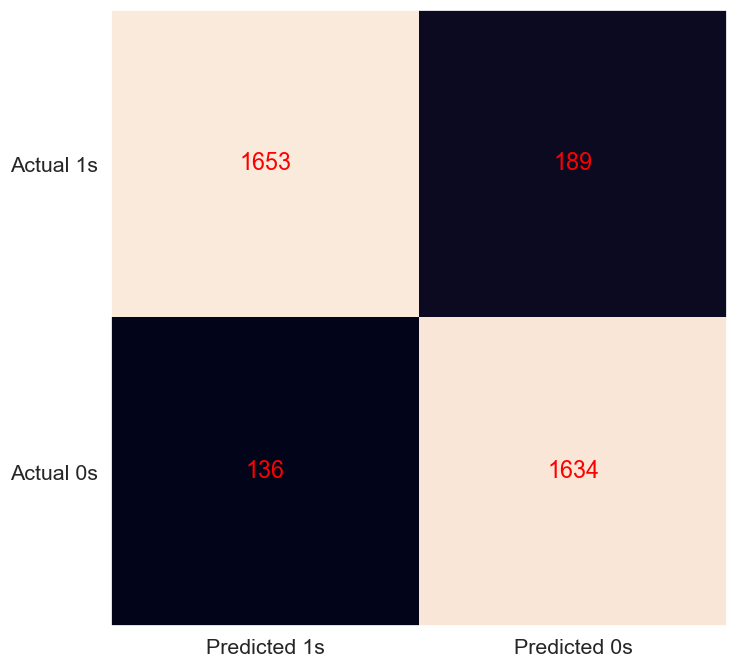

In [70]:
sns.set(font_scale=1.4) 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_svm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 1s', 'Predicted 0s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 1s', 'Actual 0s'))
ax.set_ylim(1.5, -0.5)
for i in range(0,2):
    for j in range(0,2):
        ax.text(j, i, cm_svm[i, j], ha='center', va='center', color='red')
plt.show()

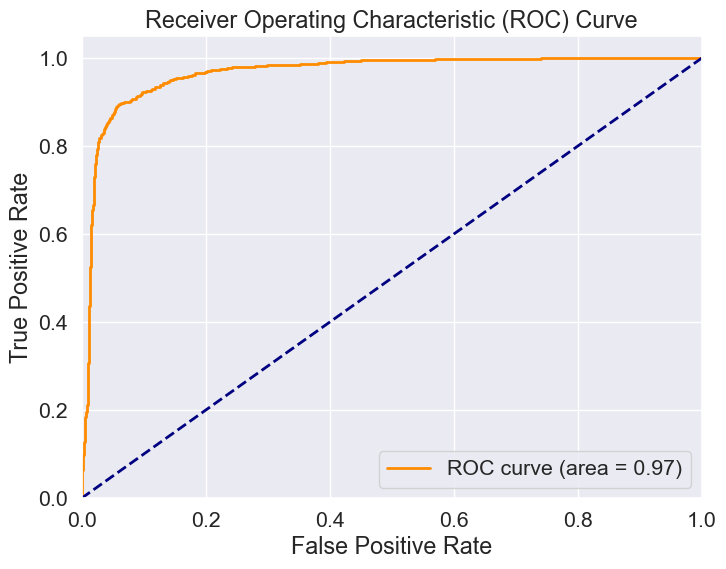

In [71]:
# plot ROC Curve


# Get decision function scores
decision_scores_svc = model_svc.decision_function(X_test_scaled)

# Calculate the false positive rate (fpr) and true positive rate (tpr)
fpr_svc, tpr_svc, thresholds_svc = roc_curve(y_test, decision_scores_svc)

# Calculate the Area Under the Curve (AUC)
roc_auc_svc = auc(fpr_svc, tpr_svc)


# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


### SVM Hyper Parameter Tunning using K-Fold Validation and Grid Search

In [103]:


from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True):
    tp, tn, fp, fn = 0, 0, 0, 0  # Initialize variables with default values
    
    if train:
        pred_train = clf.predict(X_train_scaled)
        clf_report_train = classification_report(y_train, pred_train)
        tn, fp, fn, tp = confusion_matrix(y_train, pred_train).ravel()
    else:
        pred_test = clf.predict(X_test_scaled)
        clf_report_test = classification_report(y_test, pred_test)
        tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    specificity = tn / (tn + fp)

    if train:
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy * 100:.2f}%")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1_score:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_train}")
        print("_______________________________________________")
        print("Confusion Matrix: \n", confusion_matrix(y_train, pred_train), "\n")
        
    else:
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy * 100:.2f}%")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1-score: {f1_score:.4f}")
        print(f"Specificity: {specificity:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_test}")
        print("_______________________________________________")
        print("Confusion Matrix: \n", confusion_matrix(y_test, pred_test), "\n")

params = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient
}

svm_clf = SVC(random_state=42)
svm_cv = GridSearchCV(
    svm_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

svm_cv.fit(X_train_scaled, y_train)
best_params = svm_cv.best_params_
print(f"Best parameters: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train_scaled, y_train)
print_score(svm_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(svm_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)




Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Train Result:
Accuracy Score: 99.69%
Precision: 0.9959
Recall: 0.9979
F1-score: 0.9969
Specificity: 0.9958
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7188
           1       1.00      1.00      1.00      7260

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448

_______________________________________________
Confusion Matrix: 
 [[7158   30]
 [  15 7245]] 

Test Result:
Accuracy Score: 98.67%
Precision: 0.9794
Recall: 0.9938
F1-score: 0.9865
Specificity: 0.9799
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.99      0.98      0.

## Decision-Tree Classifier

In [74]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Create a Decision Tree Classifier
tree_clf = DecisionTreeClassifier(random_state=42)

# Train the classifier
tree_clf.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_predictions = tree_clf.predict(X_train_scaled)

# Evaluate the model on the training set
print("Training Results:")
print(classification_report(y_train, train_predictions))
print("Accuracy Score:", accuracy_score(y_train, train_predictions))

# Calculate confusion matrix for training set
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, train_predictions).ravel()
specificity_train = tn_train / (tn_train + fp_train)
print("Confusion Matrix:\n", confusion_matrix(y_train, train_predictions))
print("Specificity:", specificity_train)

# Calculate precision, recall, and f1-score for training set
precision_train = precision_score(y_train, train_predictions)
recall_train = recall_score(y_train, train_predictions)
f1_train = f1_score(y_train, train_predictions)

print("Precision:", precision_train)
print("Recall:", recall_train)
print("F1-score:", f1_train)

# Make predictions on the test set
test_predictions = tree_clf.predict(X_test_scaled)

# Evaluate the model on the test set
print("\nTesting Results:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score:", accuracy_score(y_test, test_predictions))

# Calculate confusion matrix for test set
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, test_predictions).ravel()
specificity_test = tn_test / (tn_test + fp_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))
print("Specificity:", specificity_test)

# Calculate precision, recall, and f1-score for test set
precision_test = precision_score(y_test, test_predictions)
recall_test = recall_score(y_test, test_predictions)
f1_test = f1_score(y_test, test_predictions)

print("Precision:", precision_test)
print("Recall:", recall_test)
print("F1-score:", f1_test)


Training Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7188
           1       1.00      1.00      1.00      7260

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448

Accuracy Score: 1.0
Confusion Matrix:
 [[7188    0]
 [   0 7260]]
Specificity: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Testing Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1842
           1       0.97      0.99      0.98      1770

    accuracy                           0.98      3612
   macro avg       0.98      0.98      0.98      3612
weighted avg       0.98      0.98      0.98      3612

Accuracy Score: 0.9814507198228128
Confusion Matrix:
 [[1797   45]
 [  22 1748]]
Specificity: 0.9755700325732899
Precision: 0.9749023982152817
Recall: 0.9875706214689266
F1-score: 0.9811

### # Plot the confusion matrix

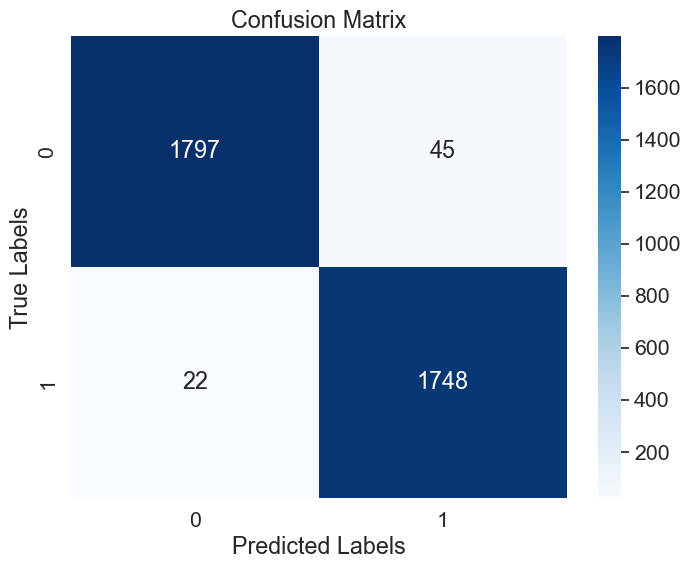

In [75]:


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()




### Hyper Parameter tuning for Decision Tree Classifier using Grid Search

In [76]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True):
    if train:
        pred_train = clf.predict(X_train_scaled)
        clf_report_train = classification_report(y_train, pred_train)
        tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, pred_train).ravel()
        specificity_train = tn_train / (tn_train + fp_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred_train) * 100:.2f}%")
        print(f"Precision: {precision_score(y_train, pred_train):.4f}")
        print(f"Recall: {recall_score(y_train, pred_train):.4f}")
        print(f"F1-score: {f1_score(y_train, pred_train):.4f}")
        print(f"Specificity: {specificity_train:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_train}")
        print("_______________________________________________")
        print("Confusion Matrix: \n", confusion_matrix(y_train, pred_train), "\n")
        
    else:
        pred_test = clf.predict(X_test_scaled)
        clf_report_test = classification_report(y_test, pred_test)
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, pred_test).ravel()
        specificity_test = tn_test / (tn_test + fp_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred_test) * 100:.2f}%")
        print(f"Precision: {precision_score(y_test, pred_test):.4f}")
        print(f"Recall: {recall_score(y_test, pred_test):.4f}")
        print(f"F1-score: {f1_score(y_test, pred_test):.4f}")
        print(f"Specificity: {specificity_test:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_test}")
        print("_______________________________________________")
        print("Confusion Matrix: \n", confusion_matrix(y_test, pred_test), "\n")

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=-1, 
    verbose=1, 
    cv=5
)

tree_cv.fit(X_train_scaled, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params}")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train_scaled, y_train)
print_score(tree_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)
print_score(tree_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 19, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Train Result:
Accuracy Score: 99.99%
Precision: 1.0000
Recall: 0.9997
F1-score: 0.9999
Specificity: 1.0000
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7188
           1       1.00      1.00      1.00      7260

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448

_______________________________________________
Confusion Matrix: 
 [[7188    0]
 [   2 7258]] 

Test Result:
Accuracy Score: 98.70%
Precision: 0.9843
Recall: 0.9893
F1-score: 0.9868
Specificity: 0.9848
_______________________________________________
CLASSIFICATION REPORT:
              precision    rec

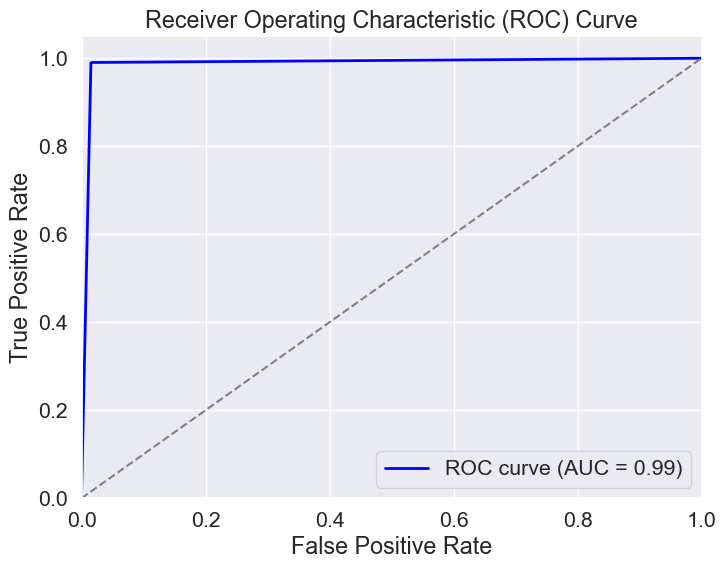

In [77]:


# Get predicted probabilities for the positive class (class 1)
test_probs = tree_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



### Visualize decision-trees

In [78]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
features = list(df)
features.remove("Taken_product")

In [79]:




dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=features, filled=True)


# Export the decision tree to Graphviz format
dot_data = export_graphviz(tree_clf, out_file=None, feature_names=features, filled=True, 
                           special_characters=True, node_ids=True, proportion=True, impurity=False,
                           rounded=True, precision=2, class_names=True, max_depth=3)

# Create graph from dot data
graph = pydotplus.graph_from_dot_data(dot_data)


# Set size and resolution parameters
graph.set_size('"250,250"')  # Set size
graph.set_dpi(600)  # Set resolution (dots per inch)

# Write the graph to a PNG file
graph.write_png("decision_tree.png")

# Display the image
Image("decision_tree.png")

## Random Forest Classifier

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

def print_score(clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True):
    if train:
        pred_train = clf.predict(X_train_scaled)
        clf_report_train = classification_report(y_train, pred_train)
        tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, pred_train).ravel()
        specificity_train = tn_train / (tn_train + fp_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred_train) * 100:.2f}%")
        print(f"Precision: {precision_score(y_train, pred_train):.4f}")
        print(f"Recall: {recall_score(y_train, pred_train):.4f}")
        print(f"F1-score: {f1_score(y_train, pred_train):.4f}")
        print(f"Specificity: {specificity_train:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_train}")
        print("_______________________________________________")
        print("Confusion Matrix: \n", confusion_matrix(y_train, pred_train), "\n")
        
    else:
        pred_test = clf.predict(X_test_scaled)
        clf_report_test = classification_report(y_test, pred_test)
        tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, pred_test).ravel()
        specificity_test = tn_test / (tn_test + fp_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred_test) * 100:.2f}%")
        print(f"Precision: {precision_score(y_test, pred_test):.4f}")
        print(f"Recall: {recall_score(y_test, pred_test):.4f}")
        print(f"F1-score: {f1_score(y_test, pred_test):.4f}")
        print(f"Specificity: {specificity_test:.4f}")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report_test}")
        print("_______________________________________________")
        print("Confusion Matrix: \n", confusion_matrix(y_test, pred_test), "\n")

# Create Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_scaled, y_train)

# Print scores for training set
print_score(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=True)

# Print scores for test set
print_score(rf_clf, X_train_scaled, y_train, X_test_scaled, y_test, train=False)


Train Result:
Accuracy Score: 100.00%
Precision: 1.0000
Recall: 1.0000
F1-score: 1.0000
Specificity: 1.0000
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7188
           1       1.00      1.00      1.00      7260

    accuracy                           1.00     14448
   macro avg       1.00      1.00      1.00     14448
weighted avg       1.00      1.00      1.00     14448

_______________________________________________
Confusion Matrix: 
 [[7188    0]
 [   0 7260]] 

Test Result:
Accuracy Score: 99.56%
Precision: 0.9960
Recall: 0.9949
F1-score: 0.9955
Specificity: 0.9962
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      0.99      1.00      1770

    accuracy                           1.00      3612
  

### Plot the Confusion Matrix

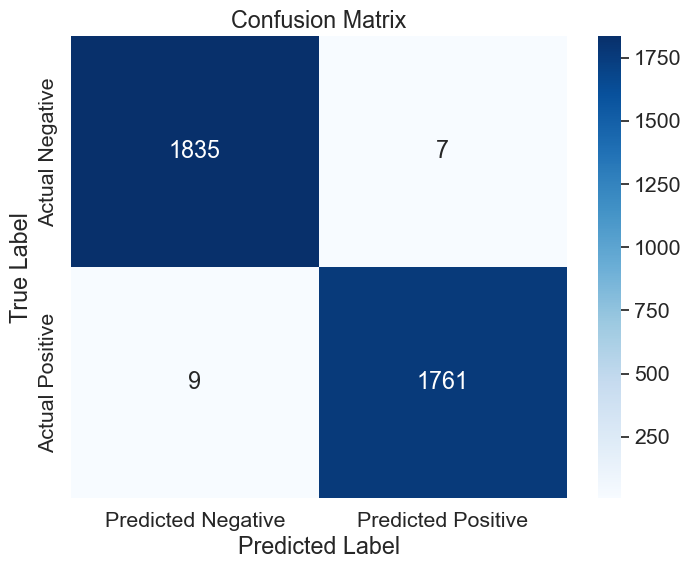

In [81]:


# Make predictions on the test set
test_predictions = rf_clf.predict(X_test_scaled)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d', 
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


### Random Forest hyperparameter tuning using RandomSearch

In [82]:
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Define the parameter grid
param_dist = {
    'n_estimators': randint(100, 1500),
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None] + list(range(2, 11)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'bootstrap': [True, False]
}

# Create a Random Forest classifier
rf_clf = RandomForestClassifier(random_state=42)

# Perform Random Search to find the best hyperparameters
random_search = RandomizedSearchCV(
    rf_clf, 
    param_distributions=param_dist, 
    n_iter=100, 
    scoring='f1', 
    cv=5, 
    verbose=1, 
    n_jobs=-1, 
    random_state=42
)

random_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = random_search.best_params_
print(f"Best parameters: {best_params}")

# Initialize a new Random Forest classifier with the best hyperparameters
rf_clf = RandomForestClassifier(**best_params)

# Fit the classifier to the training data
rf_clf.fit(X_train_scaled, y_train)

# Evaluate the classifier on the test data
pred_test = rf_clf.predict(X_test_scaled)
print("Test Results:")
print("Accuracy Score:", accuracy_score(y_test, pred_test))
print("Precision:", precision_score(y_test, pred_test))
print("Recall:", recall_score(y_test, pred_test))
print("F1-score:", f1_score(y_test, pred_test))
tn, fp, fn, tp = confusion_matrix(y_test, pred_test).ravel()
specificity = tn / (tn + fp)
print("Specificity:", specificity)
print("Confusion Matrix:\n", confusion_matrix(y_test, pred_test))
print("Classification Report:\n", classification_report(y_test, pred_test))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 1391}
Test Results:
Accuracy Score: 0.9969545957918051
Precision: 0.9977362761743067
Recall: 0.996045197740113
F1-score: 0.9968900197907832
Specificity: 0.997828447339848
Confusion Matrix:
 [[1838    4]
 [   7 1763]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      1.00      1.00      1770

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



### ROC curve for Random Forest

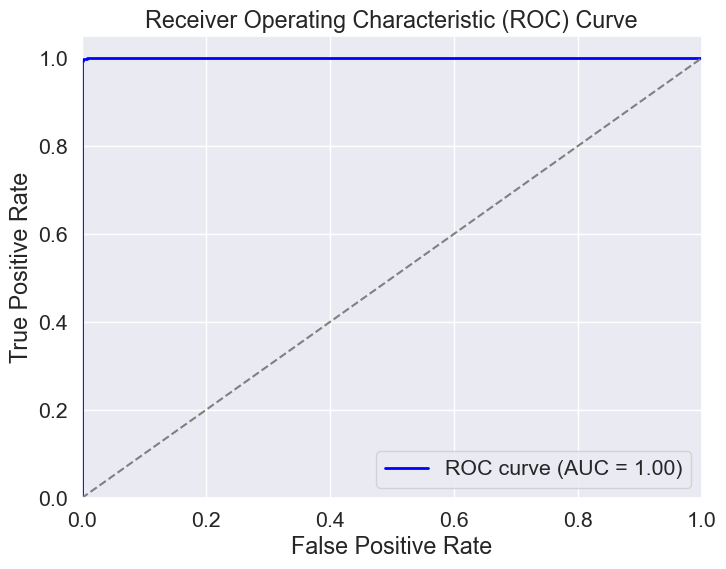

In [83]:


# Get predicted probabilities for the positive class
y_probs = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Compute AUC score
auc_rf = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_rf)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## XG Boost Classifier

In [84]:
# Create XGBoost classifier
xgb_clf = XGBClassifier()

# Train the classifier
xgb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_test_pred_xg = xgb_clf.predict(X_test_scaled)

# Make predictions on the train data
y_train_pred_xg = xgb_clf.predict(X_train_scaled)

In [85]:
# Calculate accuracy
test_accuracy_xg = accuracy_score(y_test, y_test_pred_xg)
print("Test Accuracy:", test_accuracy_xg)

train_accuracy_xg = accuracy_score(y_train, y_train_pred_xg)
print("Training Accuracy:", train_accuracy_xg)

Test Accuracy: 0.9961240310077519
Training Accuracy: 1.0


In [86]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Calculate specificity, precision, recall, and F1-score
specificity_xg = specificity_score(y_test, y_test_pred_xg)
precision_xg = precision_score(y_test, y_test_pred_xg)
recall_xg = recall_score(y_test, y_test_pred_xg)
f1_xg = f1_score(y_test, y_test_pred_xg)

# Calculate accuracy
accuracy_xg = accuracy_score(y_test, y_test_pred_xg)

# Print out accuracy, specificity, precision, recall, and F1-score
print("Accuracy:", accuracy_xg)
print("Specificity:", specificity_xg)
print("Precision:", precision_xg)
print("Recall:", recall_xg)
print("F1-score:", f1_xg)


Accuracy: 0.9961240310077519
Specificity: 0.99728555917481
Precision: 0.9971687429218573
Recall: 0.9949152542372881
F1-score: 0.9960407239819005


In [87]:

# Generate classification report
xgb_cl_report = classification_report(y_test, y_test_pred_xg)

# Print the classification report
print("Classification Report:\n", xgb_cl_report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      0.99      1.00      1770

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



### XG Boost Classifier hyper parameter tuning using Gridsearch

In [88]:
def specificity_score(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn + fp)
    return specificity


In [89]:
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [3, 5, 7],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001]  # Learning rate
}

# Create XGBoost classifier
xgb_clf = XGBClassifier()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best estimator
best_xgb_clf = grid_search.best_estimator_

# Evaluate the best model on test data
accuracy = best_xgb_clf.score(X_test_scaled, y_test)
print("Accuracy on Test Set:", accuracy)

# Make predictions on the test data using the optimized model
y_test_pred_optimized = best_xgb_clf.predict(X_test_scaled)

# Calculate precision, recall, f1-score, and specificity
precision = precision_score(y_test, y_test_pred_optimized)
recall = recall_score(y_test, y_test_pred_optimized)
f1 = f1_score(y_test, y_test_pred_optimized)
specificity = specificity_score(y_test, y_test_pred_optimized)

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Specificity:", specificity)

# Generate classification report for the optimized model
classification_report_optimized = classification_report(y_test, y_test_pred_optimized)

# Print the classification report
print("Classification Report for Optimized Model:\n", classification_report_optimized)


Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
Accuracy on Test Set: 0.9972314507198228
Precision: 0.9971751412429378
Recall: 0.9971751412429378
F1-score: 0.9971751412429379
Specificity: 0.99728555917481
Classification Report for Optimized Model:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1842
           1       1.00      1.00      1.00      1770

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



#### ROC curve for the XG Boost Classifier

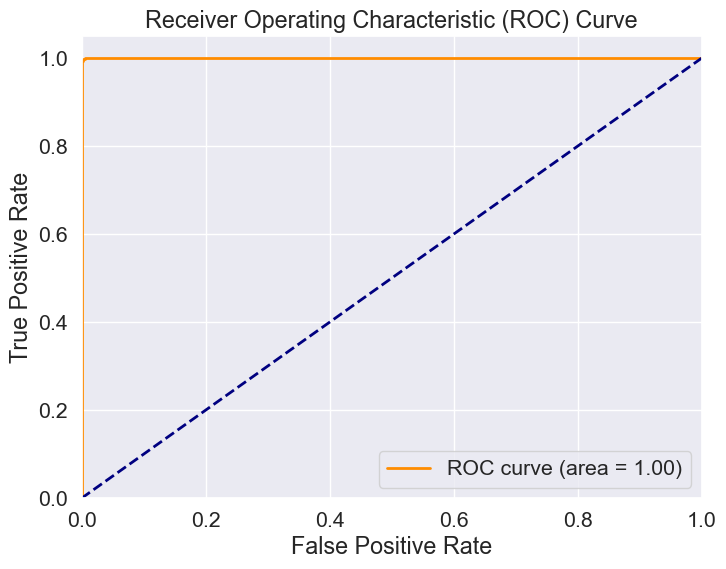

In [90]:

# Compute ROC curve for the optimized XGBoost model
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_clf.predict_proba(X_test_scaled)[:,1])
roc_auc_score = auc(fpr, tpr)  # Renamed the variable to avoid conflict

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



## KNN Classifier

In [91]:


# Create a KNN Classifier
knn_clf = KNeighborsClassifier()

# Train the classifier
knn_clf.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_predictions = knn_clf.predict(X_train_scaled)

# Evaluate the model on the training set
print("Training Results:")
print(classification_report(y_train, train_predictions))
print("Accuracy Score:", accuracy_score(y_train, train_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_predictions))

# Make predictions on the test set
test_predictions = knn_clf.predict(X_test_scaled)

# Evaluate the model on the test set
print("\nTesting Results:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score:", accuracy_score(y_test, test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))

Training Results:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      7188
           1       0.98      0.99      0.99      7260

    accuracy                           0.99     14448
   macro avg       0.99      0.99      0.99     14448
weighted avg       0.99      0.99      0.99     14448

Accuracy Score: 0.9890642303433002
Confusion Matrix:
 [[7069  119]
 [  39 7221]]

Testing Results:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1842
           1       0.95      0.99      0.97      1770

    accuracy                           0.97      3612
   macro avg       0.97      0.97      0.97      3612
weighted avg       0.97      0.97      0.97      3612

Accuracy Score: 0.9731450719822813
Confusion Matrix:
 [[1758   84]
 [  13 1757]]


In [92]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Evaluate the model on the test set
test_predictions = knn_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)
test_specificity = specificity_score(y_test, test_predictions)

print("\nTesting Results:")
print(" ")
print(f"Accuracy Score: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1_score:.4f}")
print(f"Specificity: {test_specificity:.4f}")



Testing Results:
 
Accuracy Score: 0.9731
Precision: 0.9544
Recall: 0.9927
F1-score: 0.9731
Specificity: 0.9544


### Hyperparameter Tunning for KNN classifier

In [93]:
# from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [10, 20, 30]
}

# Create a KNN classifier
knn = KNeighborsClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)



# Create a KNN classifier with the best hyperparameters
best_knn = KNeighborsClassifier(**best_params)

# Train the classifier on the training data
best_knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_test = best_knn.predict(X_test_scaled)

# Calculate evaluation metrics on the test set
test_accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

# Calculate specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
specificity = tn / (tn + fp)

# Print evaluation metrics
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Specificity: {specificity:.4f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_test))


Best hyperparameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Accuracy: 0.9970
Precision: 0.9944
Recall: 0.9994
F1-score: 0.9969
Specificity: 0.9946
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1842
           1       0.99      1.00      1.00      1770

    accuracy                           1.00      3612
   macro avg       1.00      1.00      1.00      3612
weighted avg       1.00      1.00      1.00      3612



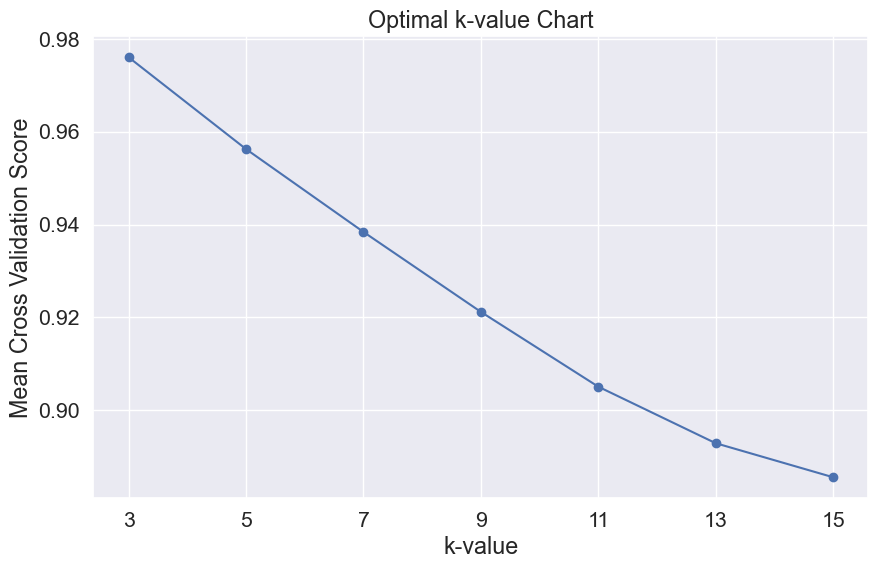

In [94]:
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score
# from sklearn.neighbors import KNeighborsClassifier

# Define the range of k values to test
k_values = [3, 5, 7, 9, 11, 13, 15]

# List to store the mean cross-validation scores for each k
mean_cv_scores = []

# Iterate over each value of k
for k in k_values:
    # Create a KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Perform cross-validation
    cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
    
    # Calculate the mean cross-validation score
    mean_cv_score = np.mean(cv_scores)
    
    # Append the mean score to the list
    mean_cv_scores.append(mean_cv_score)

# Plot the k-values against the mean cross-validation scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_cv_scores, marker='o', linestyle='-')
plt.title('Optimal k-value Chart')
plt.xlabel('k-value')
plt.ylabel('Mean Cross Validation Score')
plt.grid(True)
plt.xticks(k_values)
plt.show()


#### ROC curve for the KNN classifier



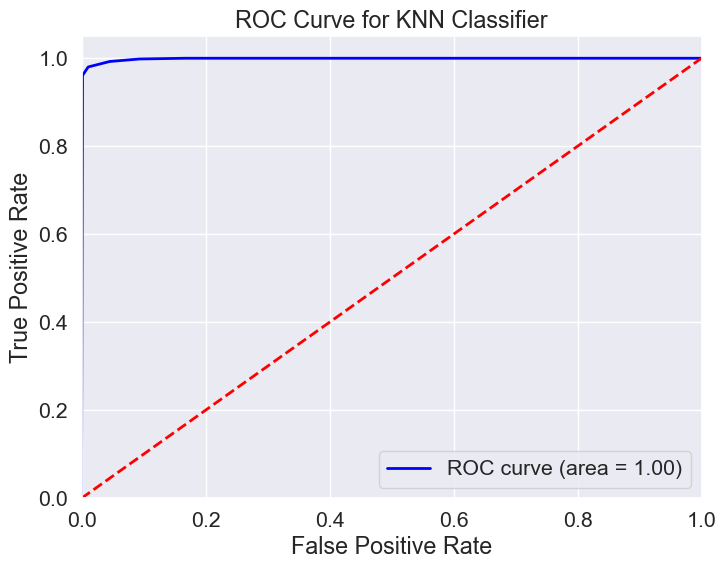

In [95]:


# Get the predicted probabilities for the positive class
y_probs = knn_clf.predict_proba(X_test_scaled)[:, 1]

# Compute the ROC curve and the area under the curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

## Naive Bayes Classifier

In [96]:


# Create a Naive Bayes Classifier
nb_clf = GaussianNB()

# Train the classifier
nb_clf.fit(X_train_scaled, y_train)

# Make predictions on the training set
train_predictions = nb_clf.predict(X_train_scaled)

# Evaluate the model on the training set
print("Training Results:")
print(classification_report(y_train, train_predictions))
print("Accuracy Score:", accuracy_score(y_train, train_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_train, train_predictions))

# Make predictions on the test set
test_predictions = nb_clf.predict(X_test_scaled)

# Evaluate the model on the test set
print("\nTesting Results:")
print(classification_report(y_test, test_predictions))
print("Accuracy Score:", accuracy_score(y_test, test_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, test_predictions))

Training Results:
              precision    recall  f1-score   support

           0       0.71      0.59      0.65      7188
           1       0.65      0.76      0.70      7260

    accuracy                           0.68     14448
   macro avg       0.68      0.68      0.67     14448
weighted avg       0.68      0.68      0.68     14448

Accuracy Score: 0.6773947951273532
Confusion Matrix:
 [[4268 2920]
 [1741 5519]]

Testing Results:
              precision    recall  f1-score   support

           0       0.72      0.58      0.64      1842
           1       0.64      0.76      0.69      1770

    accuracy                           0.67      3612
   macro avg       0.68      0.67      0.67      3612
weighted avg       0.68      0.67      0.67      3612

Accuracy Score: 0.6688815060908084
Confusion Matrix:
 [[1068  774]
 [ 422 1348]]


In [97]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

def specificity_score(y_true, y_pred):
    tn, fp, _, _ = confusion_matrix(y_true, y_pred).ravel()
    return tn / (tn + fp)

# Evaluate the model on the test set
test_predictions = nb_clf.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1_score = f1_score(y_test, test_predictions)
test_specificity = specificity_score(y_test, test_predictions)

print("\nTesting Results:")
print()
print(f"Accuracy Score: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-score: {test_f1_score:.4f}")
print(f"Specificity: {test_specificity:.4f}")




Testing Results:

Accuracy Score: 0.6689
Precision: 0.6352
Recall: 0.7616
F1-score: 0.6927
Specificity: 0.5798


### Hyperparameter Tunning for Naive Bayes classifier

In [98]:
#from sklearn.model_selection import GridSearchCV
#from sklearn.naive_bayes import GaussianNB
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter grid
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Adjust the values as needed
}

# Create a Gaussian Naive Bayes classifier
nb_clf = GaussianNB()

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=nb_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Create a Naive Bayes classifier with the best parameters
best_nb_clf = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Train the classifier with the entire training data
best_nb_clf.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = best_nb_clf.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, output_dict=True)

# Calculate specificity
tn, fp, fn, tp = conf_matrix.ravel()
specificity = tn / (tn + fp)

# Print evaluation metrics
print("\nTest Results:")
print("Accuracy:", accuracy)
print("Precision:", class_report['weighted avg']['precision'])
print("Recall:", class_report['weighted avg']['recall'])
print("F1-score:", class_report['weighted avg']['f1-score'])
print("Specificity:", specificity)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred))


Best Parameters: {'var_smoothing': 1e-09}
Best Score: 0.6767021071454664

Test Results:
Accuracy: 0.6688815060908084
Precision: 0.6768267229261015
Recall: 0.6688815060908084
F1-score: 0.6663649517743472
Specificity: 0.5798045602605864
Confusion Matrix:
 [[1068  774]
 [ 422 1348]]
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.58      0.64      1842
           1       0.64      0.76      0.69      1770

    accuracy                           0.67      3612
   macro avg       0.68      0.67      0.67      3612
weighted avg       0.68      0.67      0.67      3612



#### ROC curve for the Gaussian Naive Bayes classifier

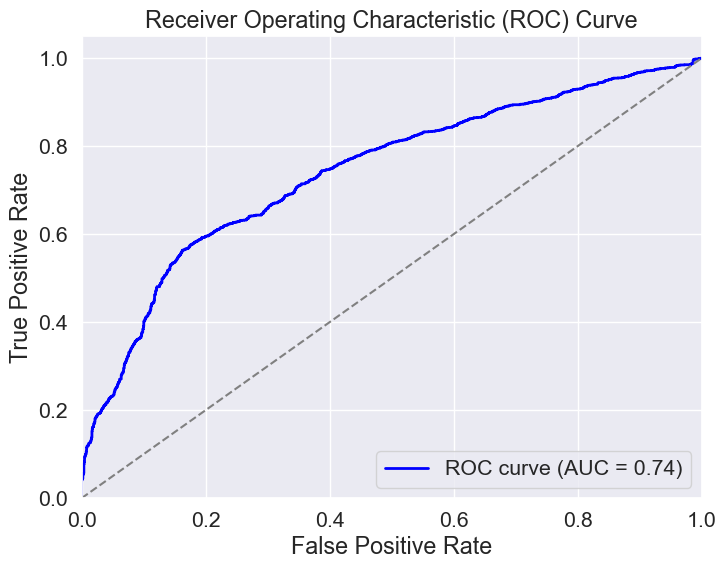

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Train the Naive Bayes classifier
nb_clf.fit(X_train_scaled, y_train)


# Get predicted probabilities for the positive class (class 1)
test_probs = nb_clf.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, test_probs)

# Calculate AUC (Area Under the Curve)
auc_nb = roc_auc_score(y_test, test_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % auc_nb)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Plotting the combined ROC curve 

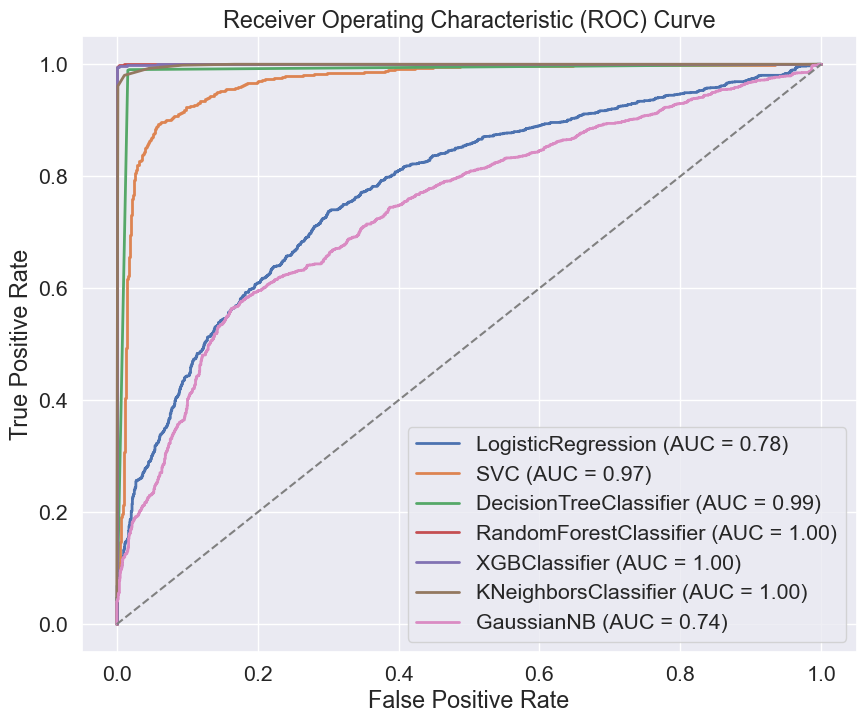

In [100]:


# List of classifiers with their fitted instances and corresponding test data
classifiers = [
    (logreg, X_test_scaled),
    (model_svc, X_test_scaled),
    (tree_clf, X_test_scaled),
    (rf_clf, X_test_scaled),
    (xgb_clf, X_test_scaled),
    (knn_clf, X_test_scaled),
    (nb_clf, X_test_scaled)
]

plt.figure(figsize=(10, 8))

for clf, X_test in classifiers:
    # Ensure the classifier is fitted
    if hasattr(clf, "fit"):
        clf.fit(X_train_scaled, y_train)
    else:
        raise ValueError("Classifier does not have a fit method.")
    
    # Compute predicted probabilities
    if hasattr(clf, "decision_function"):
        y_score = clf.decision_function(X_test)
    else:
        y_score = clf.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    label = f'{clf.__class__.__name__} (AUC = {roc_auc:.2f})'
    plt.plot(fpr, tpr, lw=2, label=label)

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Bar chart showing the performance metrics before Optimization

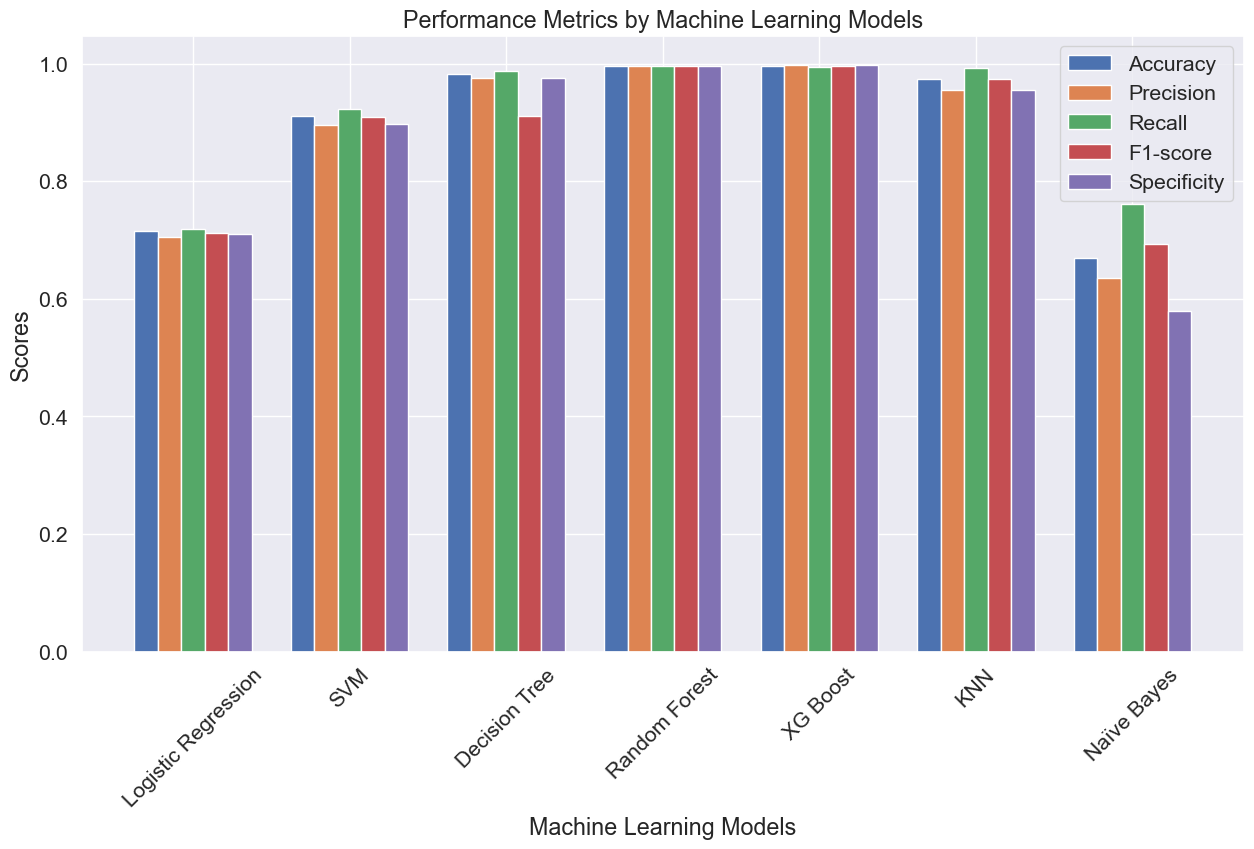

In [101]:


# Data
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'XG Boost', 'KNN', 'Naïve Bayes']
accuracy = [0.7146, 0.9100, 0.9815, 0.9956, 0.9961, 0.9731, 0.6689]
precision = [0.7045, 0.8963, 0.9749, 0.9955, 0.9972, 0.9544, 0.6352]
recall = [0.7192, 0.9232, 0.9876, 0.9955, 0.9949, 0.9927, 0.7616]
f1_score = [0.7118, 0.9095, 0.9112, 0.9955, 0.9960, 0.9731, 0.6927]
specificity = [0.7101, 0.8974, 0.9756, 0.9955, 0.9973, 0.9544, 0.5798]

# Plot
x = range(len(models))
width = 0.15

plt.figure(figsize=(15, 8))

plt.bar(x, accuracy, width, label='Accuracy')
plt.bar([i + width for i in x], precision, width, label='Precision')
plt.bar([i + width*2 for i in x], recall, width, label='Recall')
plt.bar([i + width*3 for i in x], f1_score, width, label='F1-score')
plt.bar([i + width*4 for i in x], specificity, width, label='Specificity')

plt.xlabel('Machine Learning Models')
plt.ylabel('Scores')
plt.title('Performance Metrics by Machine Learning Models')
plt.xticks([i + 2*width for i in x], models)
plt.legend()
plt.xticks(rotation=45)

plt.show()



## Bar chart showing the performance metrics after Optimization

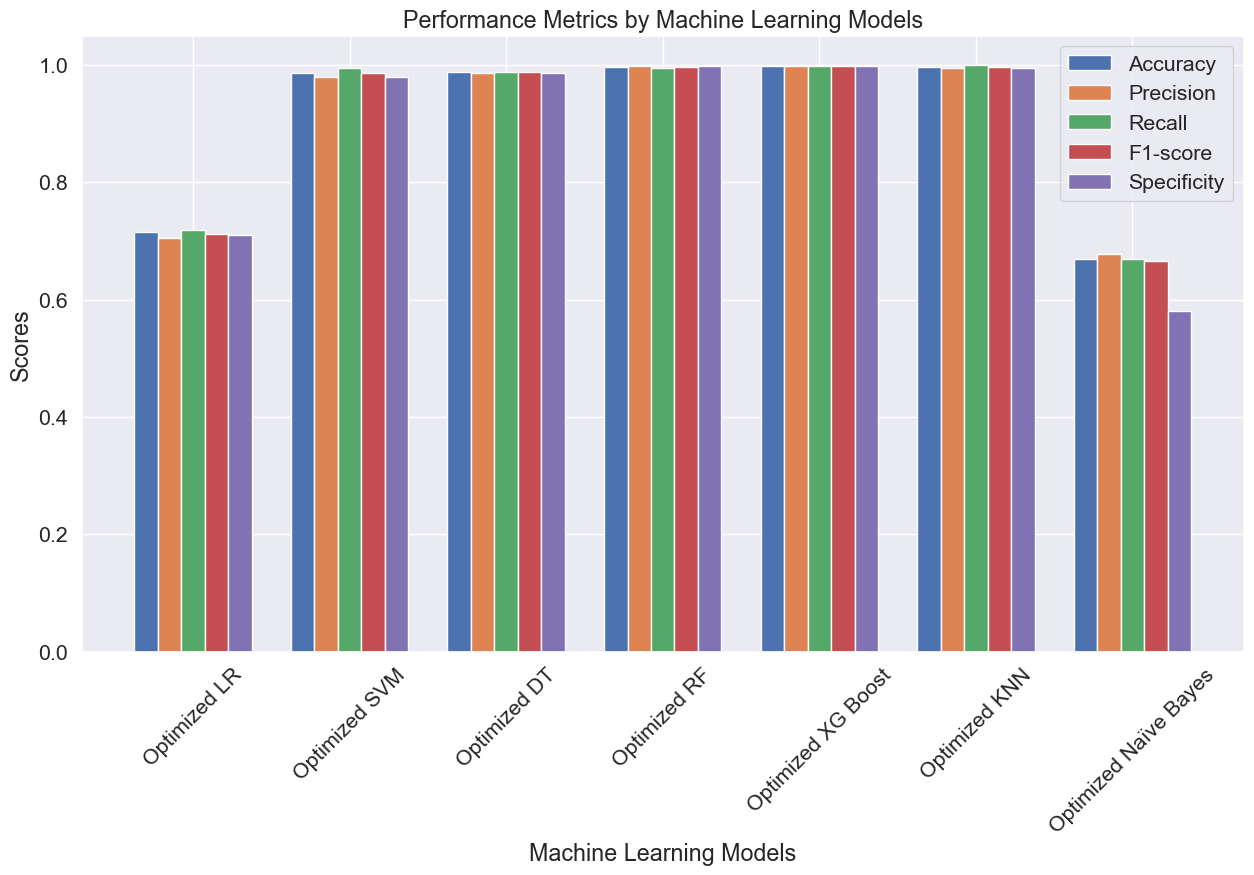

In [102]:


# Data
models = ['Optimized LR', 'Optimized SVM', 'Optimized DT',
          'Optimized RF', 'Optimized XG Boost', 'Optimized KNN',
          'Optimized Naïve Bayes']
accuracy = [0.7148, 0.9867, 0.9873, 0.9964, 0.9972, 0.9970, 0.6689]
precision = [0.7049, 0.9794, 0.9859, 0.9977, 0.9972, 0.9944, 0.6768]
recall = [0.7192, 0.9938, 0.9881, 0.9949, 0.9972, 0.9994, 0.6689]
f1_score = [0.7120, 0.9865, 0.9870, 0.9963, 0.9972, 0.9969, 0.6664]
specificity = [0.7106, 0.9799, 0.9864, 0.9978, 0.9973, 0.9946, 0.5798]

# Plot
x = range(len(models))
width = 0.15

plt.figure(figsize=(15, 8))

plt.bar(x, accuracy, width, label='Accuracy')
plt.bar([i + width for i in x], precision, width, label='Precision')
plt.bar([i + width*2 for i in x], recall, width, label='Recall')
plt.bar([i + width*3 for i in x], f1_score, width, label='F1-score')
plt.bar([i + width*4 for i in x], specificity, width, label='Specificity')

plt.xlabel('Machine Learning Models')
plt.ylabel('Scores')
plt.title('Performance Metrics by Machine Learning Models')
plt.xticks([i + 2*width for i in x], models)
plt.legend()
plt.xticks(rotation=45)

plt.show()


### Result Discussion

Firstly, the Test accuracy and Train accuracy for all our models were compared to show that there is no instance of overfitting or underfitting (luck) with our machine learning algorithms. 
The findings revealed that Decision Tree (DT), Random Forest (RF), and XGBoost, demonstrated exceptionally high accuracies ranging from 98% to 99%, with XGBoost exhibiting the highest accuracy rate of 99.61%. XGBoost, an ensemble technique comprised of Decision Trees, employs a gradient-based optimization algorithm to iteratively refine the predictions of individual trees, thereby enhancing its predictive performance. The underlying mechanism of XGBoost endows it with a notable propensity for achieving high levels of accuracy. The SVM and KNN models achieved accuracies of 91.00% and 97.31%, respectively. These results indicate that the machine learning models exhibited a notable capacity for making accurate predictions Although, The KNN algorithm operates without explicit model training, yet it was able to accurately classify the data based on similarity measure. In contrast, the SVM has the flexibility of handling both linear and non-linear relationship between variables by using different kernel function. This flexibility allows it to capture complex pattern in the data. This principle also accounts for its high performance. The Naïve Bayes and LR models exhibited the lowest performance, with accuracies of 66.89% and 71.46% respectively. This is despite employing the optimization techniques to improve their performance. This underscores the limited effectiveness of both algorithms in the predictive model.
The accuracy of the LR and Naïve Bayes did not show any improvement after optimization using the GridSearch. The accuracy for DT, RF and XG Boost improved marginally by 0.58%, 0.08% and 0.11% respectively, while the accuracy values for the KNN and SVM showed substantial improvement of 2.39% and 7.67% respectively. There was also a marginal increase of 0.02% when the Optuna was employed with the LR. The Optuna uses techniques like tree-structured Parzen estimators (TPE) to intelligently search the hyperparameter space. 
We used the Grid search strategy to explore various combinations of hyperparameters to identify the optimal configuration and get the best k-value. We explored the values of (3, 5, 7, and 9) for the number of neighbors. The best k value ( 'n_neighbors': 3 ) was determined through cross-validation

False Positive and False Negative Trade-Off

According to (Suresh and Guttag, 2021), accuracy is limited and cannot be relied upon singly to determine a model’s performance. In the context of developing a predictive model to anticipate the response of targeted potential customers, towards consumption of the travel products (Tourism), we considered other parameters to determine performance other than the accuracy value The False Positive (FP) predictions is very significant in this context because it could lead to misidentifying customers who are not inclined to purchase the product as potential consumers of the products. Conversely, an accurate prediction of the unwilling group would be a True Negative (TN), which will equip the product managers (Tourism organisation) with reliable insights about the unwilling group and help them make appropriate decision regarding them
Given the aforementioned considerations, our focus is directed towards selecting a machine learning model with high precision because Precision emphasizes on the proportion of positive predictions correctly classified and is important when there is high cost associated with FP . By prioritizing precision, the model can effectively minimize the risk of misclassification, and help the management take informed decision Precision measures the proportion of correctly classified positive predictions, and it is useful when the cost of false positives is high; and Recall measures the number of true positives correctly identified, and it is importance when the cost of false negatives is high. In this work, it is observed that only the XGBoost and Random Forest models exhibited a Precision value that is equal or higher than the Recall values before optimization. They still maintained equal or higher precision value, as well as the Naïve Bayes after optimization Conversely, all the other models demonstrated a Recall value that is higher than Precision. This implication is that the other models are inclined towards a higher incidence of False Negatives (FN) compared to their ability to identify False positives (FP). Such a scenario underscores the potential risk of misclassifying genuine potential consumers as non-consumers, thereby necessitating careful consideration of the associated costs and implications when selecting a model for predictive tasks in the Tourism domain.

Conclusion

Based on the analysis, XG Boost, Random Forest models and optimized Naïve Bayes emerge as promising choices due to their ability to minimize the risk of misclassification. Further exploration of ensemble methods and parameter tuning techniques could enhance predictive performance across all models. Additionally, ongoing monitoring and refinement of models are essential to adapt to changing customer behaviours and market dynamics in the Tourism sector
